<a id = "backtop"> </a>

---  
# Heart Failure Prediction
---

# Table of Content

1. [Chapter 1: Data Description](#datades)
2. [Chapter 2: Library](#libimp)
3. [Chapter 3: Feature Engineering](#Chapter1)  
   3.1 [Dataset Import](#Chapter1.1)  
   3.2 [Dataset Inspection](#Chapter1.2)  
   3.3 [Missing Value Removal](#Chapter1.3)  
   3.4 [Duplicated Data Entries Removal](#Chapter1.4)  
   3.5 [Categorical and Continuous Data Seperation](#Chapter1.5)  
   3.6 [Categorical Data Conversion](#Chapter1.6)  
4. [Chapter 4: Exploratory Data Analysis](#Chapter2)  
     4.1 [Plot Generation](#Chapter2.1)  
     4.1.1 [Univariate Plots (Categorical Features)](#Chapter2.1.1)  
     4.1.2 [Univariate Plots (Continuous Features)](#Chapter2.1.2)  
     4.1.3 [Multivariate Plots](#Chapter2.1.3)  
     4.2 [Data Analysis](#Chapter2.2)  
     4.2.1 [Univariate Analysis (Categorical Features)](#Chapter2.2.1)  
     4.2.2 [Univariate Analysis (Continuous Features)](#Chapter2.2.2)  
     4.2.3 [Multivariate Analysis](#Chapter2.2.3)  
5. [Chapter 5: Base Model Building](#Chapter3)  
     5.1 [Data Preprocessing](#Chapter3.1)  
     5.2 [Base Model](#Chapter3.2)  
     5.2.01 [Logistic Regression](#Chapter3.2.1)    
     5.2.02 [K Nearest Neighbour (KNN)](#Chapter3.2.2)  
     5.2.03 [Naive Bayes](#Chapter3.2.3)  
     5.2.04 [Decision Tree](#Chapter3.2.4)   
     5.2.05 [Extra Tree](#Chapter3.2.5)   
     5.2.06 [Random Forest](#Chapter3.2.6)   
     5.2.07 [Support Vector Machine Linear (SVML)](#Chapter3.2.71)   
     5.2.08 [Support Vector Machine RBF (SVMR)](#Chapter3.2.72)  
     5.2.09 [Adaptive Boost](#Chapter3.2.8)  
     5.2.10 [Stochastic Gradient Descent](#Chapter3.2.9)  
     5.2.11 [Gradient Boosting](#Chapter3.2.10)  
     5.2.12 [XGBoost](#Chapter3.2.11)  
     5.2.13 [Multiple Layer Perceptron (MLP)](#Chapter3.2.9)  
6. [Chapter 6: Stacked Ensemble](#Chapter4)  
     6.1 [Stacked Model Building](#Chapter4.1)  
     6.2 [Model Comparison](#Chapter4.2)  
     6.3 [Saving the Model](#Chapter4.3) 
7. [Chapter 7: Feature Evaluation](#Chapter5)  
     7.1 [SHAP Analysis](#Chapter5.1)  
     7.2 [Statistical Analysis](#Chapter5.2)  
8. [Chapter 8: Feature Reselection](#Chapter6)  
9. [Chapter 9: Conclusion](#Chapter7)  


<a id = "datades"> </a>

---
# Chapter 1: Data Description 
---
 
This dataset consists of 12 columns with each having 1190 instances. 

There are 12 features encompassing 6 categorical features and 5 continuous features with a binary output of whether the patient is diagnosed with heart failure.

The Heat Failure Dataset used for prediction can be accessed [Here](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

---
 
 #### Features
    1. Age: Age in years
    
    2. Sex
        a. 0 = Female
        b. 1 = Male
        
    3. Chest Pain Type
        a. 1 = Typical Angina
        b. 2 = Atypical Angina
        c. 3 = Non-Anginal Pain
        d. 4 = Asymptomatic
              
    4. Resting Blood Pressure (measured in mm/Hg upon hosptial admission)
       
    5. Resting ECG
        a. 0 = Normal
        b. 1 = ST Segment Abnormality
        c. 2 = Left Ventricular Hypertrophy     
        
    6. Maximum Heart Rate (measured in BPM)
    
    7. Exercise-induced Angina
        a. 0 = No
        b. 1 = Yes
    
    8. ST Depression: ST Depression induced by exercise (measured in mV)
    
    9. Slope: ST Segment Slopping during exercise
        a. 1 = Up Slopping  
        b. 2 = Flat
        c. 3 = Down Slopping
    
    10. Diabetic (if fasting blood glucose level is > 125 mg/dL)
        a. 0 = No
        b. 1 = Yes

    11. Cholesterol (measured in mg/dL) 
    
---
 
 #### Output
     1. Heart Failure
         a. 0 = No
         b. 1 = Yes
         
---

##### [Back to Top](#backtop)

<a id = "libimp"> </a>

---
# Chapter 2: Library
---

In [60]:
# General Library
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Date Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Base Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

# Ensemble Stacking
from vecstack import stacking

# Saving Model
import pickle
import joblib

# Model Evaluation and Optimization
from scipy import stats
from sklearn import metrics
from sklearn.metrics import log_loss, roc_auc_score, precision_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score, matthews_corrcoef
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from imblearn.metrics import geometric_mean_score

# Feature Evaluation
import shap
from pdpbox import pdp, get_dataset, info_plots
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

##### [Back to Top](#backtop)

<a id = "Chapter1"> </a>

---
# Chapter 3: Feature Engineering
---

<a id = "Chapter1.1"> </a>
## 3.1 Dataset Import

In [2]:
dst = pd.read_csv('HFD2.csv')
dst.head(10)

Age  Sex  Chest Pain Type  Resting Blood Pressure  Resting ECG  \
0  40.0  1.0              2.0                   140.0          0.0   
1  49.0  0.0              3.0                   160.0          0.0   
2  37.0  1.0              2.0                   130.0          1.0   
3  48.0  0.0              4.0                   138.0          0.0   
4  54.0  1.0              3.0                   150.0          0.0   
5  39.0  1.0              3.0                   120.0          0.0   
6  45.0  0.0              2.0                   130.0          0.0   
7  54.0  1.0              2.0                   110.0          0.0   
8  37.0  1.0              4.0                   140.0          0.0   
9  48.0  0.0              2.0                   120.0          0.0   

   Maximum Heart Rate  Exercised-induced Angina  ST Depression  Slope  \
0               172.0                       0.0            0.0    1.0   
1               156.0                       0.0            1.0    2.0   
2                98.0                       0.0            0.0    1.0   
3               108.0                       1.0            1.5    2.0   
4               122.0                       0.0            0.0    1.0   
5               170.0                       0.0            0.0    1.0   
6               170.0                       0.0            0.0    1.0   
7               142.0                       0.0            0.0    1.0   
8               130.0                       1.0            1.5    2.0   
9               120.0                       0.0            0.0    1.0   

   Diabetic  Cholesterol  Heart Failure  
0       0.0        289.0            0.0  
1       0.0        180.0            1.0  
2       0.0        283.0            0.0  
3       0.0        214.0            1.0  
4       0.0        195.0            0.0  
5       0.0        339.0            0.0  
6       0.0        237.0            0.0  
7       0.0        208.0            0.0  
8       0.0        207.0            1.0  
9       0.0        284.0            0.0

In [3]:
dst.shape

(1190, 12)

##### [Back to Top](#backtop)

<a id = "Chapter1.2"> </a>
## 3.2 Dataset Inspection

In [4]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1189 non-null   float64
 1   Sex                       1189 non-null   float64
 2   Chest Pain Type           1189 non-null   float64
 3   Resting Blood Pressure    1189 non-null   float64
 4   Resting ECG               1189 non-null   float64
 5   Maximum Heart Rate        1189 non-null   float64
 6   Exercised-induced Angina  1189 non-null   float64
 7   ST Depression             1189 non-null   float64
 8   Slope                     1189 non-null   float64
 9   Diabetic                  1189 non-null   float64
 10  Cholesterol               1189 non-null   float64
 11  Heart Failure             1189 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


##### [Back to Top](#backtop)

<a id = "Chapter1.3"> </a>
## 3.3 Missing Value Removal

In [5]:
dst.isna().sum()

Age                         1
Sex                         1
Chest Pain Type             1
Resting Blood Pressure      1
Resting ECG                 1
Maximum Heart Rate          1
Exercised-induced Angina    1
ST Depression               1
Slope                       1
Diabetic                    1
Cholesterol                 1
Heart Failure               1
dtype: int64

In [6]:
dst = dst.dropna()

##### [Back to Top](#backtop)

<a id = "Chapter1.4"> </a>
## 3.4 Duplicated Data Entries Removal 

In [7]:
dst[dst.duplicated() == True]

Age  Sex  Chest Pain Type  Resting Blood Pressure  Resting ECG  \
163   49.0  0.0              2.0                   110.0          0.0   
604   58.0  1.0              3.0                   150.0          1.0   
887   63.0  1.0              1.0                   145.0          2.0   
888   67.0  1.0              4.0                   160.0          2.0   
889   67.0  1.0              4.0                   120.0          2.0   
...    ...  ...              ...                     ...          ...   
1156  42.0  1.0              3.0                   130.0          0.0   
1157  61.0  1.0              4.0                   140.0          2.0   
1158  66.0  1.0              4.0                   160.0          2.0   
1159  46.0  1.0              4.0                   140.0          0.0   
1160  71.0  0.0              4.0                   112.0          0.0   

      Maximum Heart Rate  Exercised-induced Angina  ST Depression  Slope  \
163                160.0                       0.0            0.0    1.0   
604                118.0                       1.0            0.0    2.0   
887                150.0                       0.0            2.3    3.0   
888                108.0                       1.0            1.5    2.0   
889                129.0                       1.0            2.6    2.0   
...                  ...                       ...            ...    ...   
1156               150.0                       0.0            0.0    1.0   
1157               138.0                       1.0            1.9    1.0   
1158               138.0                       0.0            2.3    1.0   
1159               120.0                       1.0            1.8    2.0   
1160               125.0                       0.0            1.6    2.0   

      Diabetic  Cholesterol  Heart Failure  
163        0.0        208.0            0.0  
604        0.0        219.0            1.0  
887        1.0        233.0            0.0  
888        0.0        286.0            1.0  
889        0.0        229.0            1.0  
...        ...          ...            ...  
1156       0.0        180.0            0.0  
1157       0.0        207.0            1.0  
1158       0.0        228.0            0.0  
1159       0.0        311.0            1.0  
1160       0.0        149.0            0.0  

[272 rows x 12 columns]

In [8]:
dst = dst.drop_duplicates()

In [9]:
dst[dst.duplicated() == True]

Empty DataFrame
Columns: [Age, Sex, Chest Pain Type, Resting Blood Pressure, Resting ECG, Maximum Heart Rate, Exercised-induced Angina, ST Depression, Slope, Diabetic, Cholesterol, Heart Failure]
Index: []

In [10]:
dst.shape

(917, 12)

##### [Back to Top](#backtop)

<a id = "Chapter1.5"> </a>
## 3.5 Categorical and Continuous Data Seperation

In [11]:
unique_frame = {}

for item in list(dst.columns):
    unique_frame[item] = dst[item].value_counts().shape[0]

pd.DataFrame(unique_frame, index=["Number of Unique Values"]).transpose()

Number of Unique Values
Age                                            50
Sex                                             2
Chest Pain Type                                 4
Resting Blood Pressure                         67
Resting ECG                                     3
Maximum Heart Rate                            119
Exercised-induced Angina                        2
ST Depression                                  53
Slope                                           3
Diabetic                                        2
Cholesterol                                   222
Heart Failure                                   2

In [12]:
cat_data = ['Sex', 'Chest Pain Type', 'Resting ECG', 'Exercised-induced Angina', 'Slope', 'Diabetic']
con_data = ['Age', 'Resting Blood Pressure', 'ST Depression', 'Maximum Heart Rate', 'Cholesterol']
output = ['Heart Failure']

In [13]:
dst[con_data].describe().transpose()

count        mean         std   min    25%    50%  \
Age                     917.0   53.495093    9.425601  28.0   47.0   54.0   
Resting Blood Pressure  917.0  132.377317   18.515114   0.0  120.0  130.0   
ST Depression           917.0    0.888332    1.066749  -2.6    0.0    0.6   
Maximum Heart Rate      917.0  136.814613   25.473732  60.0  120.0  138.0   
Cholesterol             917.0  198.803708  109.443764   0.0  173.0  223.0   

                          75%    max  
Age                      60.0   77.0  
Resting Blood Pressure  140.0  200.0  
ST Depression             1.5    6.2  
Maximum Heart Rate      156.0  202.0  
Cholesterol             267.0  603.0

##### [Back to Top](#backtop)

<a id = "Chapter1.6"> </a>
## 3.6 Categorical Data Conversion

In [14]:
dst_anno = dst.copy(deep = True)

dst_anno["Sex"] = dst_anno["Sex"].apply(lambda  x: 'Male' if x == 1 else 'Female')

dst_anno["Chest Pain Type"] = dst_anno["Chest Pain Type"].apply(lambda  x: 'Typical Angina' if x == 1 
                                                                else ('Atypical Angina' if x == 2
                                                                     else ('Non-anginal Pain' if x == 3
                                                                          else 'Asymptomatic')))

dst_anno["Resting ECG"] = dst_anno["Resting ECG"].apply(lambda  x: 'Normal' if x == 0 
                                                        else ('ST Segment Abnormality' if x == 1 else 'Left Ventricular Hypertrophy'))

dst_anno["Slope"] = dst_anno["Slope"].apply(lambda  x: 'Down Slopping' if x == 3 
                                            else ('Flat' if x == 2 else 'Up Slopping'))

dst_anno["Exercised-induced Angina"] = dst_anno["Exercised-induced Angina"].apply(lambda  x: 'Yes' if x == 1 else 'No')

dst_anno["Diabetic"] = dst_anno["Diabetic"].apply(lambda  x: 'Yes' if x == 1 else 'No')

dst_anno["Heart Failure"] = dst_anno["Heart Failure"].apply(lambda  x: 'Yes' if x == 1 else 'No')

yes = dst_anno[dst_anno["Heart Failure"] == "Yes"]
no = dst_anno[dst_anno["Heart Failure"] == "No"]

dst_anno.head(10)

Age     Sex   Chest Pain Type  Resting Blood Pressure  \
0  40.0    Male   Atypical Angina                   140.0   
1  49.0  Female  Non-anginal Pain                   160.0   
2  37.0    Male   Atypical Angina                   130.0   
3  48.0  Female      Asymptomatic                   138.0   
4  54.0    Male  Non-anginal Pain                   150.0   
5  39.0    Male  Non-anginal Pain                   120.0   
6  45.0  Female   Atypical Angina                   130.0   
7  54.0    Male   Atypical Angina                   110.0   
8  37.0    Male      Asymptomatic                   140.0   
9  48.0  Female   Atypical Angina                   120.0   

              Resting ECG  Maximum Heart Rate Exercised-induced Angina  \
0                  Normal               172.0                       No   
1                  Normal               156.0                       No   
2  ST Segment Abnormality                98.0                       No   
3                  Normal               108.0                      Yes   
4                  Normal               122.0                       No   
5                  Normal               170.0                       No   
6                  Normal               170.0                       No   
7                  Normal               142.0                       No   
8                  Normal               130.0                      Yes   
9                  Normal               120.0                       No   

   ST Depression        Slope Diabetic  Cholesterol Heart Failure  
0            0.0  Up Slopping       No        289.0            No  
1            1.0         Flat       No        180.0           Yes  
2            0.0  Up Slopping       No        283.0            No  
3            1.5         Flat       No        214.0           Yes  
4            0.0  Up Slopping       No        195.0            No  
5            0.0  Up Slopping       No        339.0            No  
6            0.0  Up Slopping       No        237.0            No  
7            0.0  Up Slopping       No        208.0            No  
8            1.5         Flat       No        207.0           Yes  
9            0.0  Up Slopping       No        284.0            No

##### [Back to Top](#backtop)

<a id = "Chapter2"> </a>

---
# Chapter 4: Exploratory Data Analysis
---

<a id = "Chapter2.1"> </a>
## 4.1 Plot Generation

<a id = "Chapter2.1.1"> </a>
### 4.1.1 Univariate Plots (Categorical Features)

In [15]:
fig1 = plt.figure(figsize=(25,20))
grid_co = fig1.add_gridspec(3,3)
grid_co.update(wspace = 0.2, hspace = 0.45)
ax1 = fig1.add_subplot(grid_co[0,1])
ax3 = fig1.add_subplot(grid_co[1,0])
ax4 = fig1.add_subplot(grid_co[1,1])
ax5 = fig1.add_subplot(grid_co[1,2])
ax6 = fig1.add_subplot(grid_co[2,0])
ax7 = fig1.add_subplot(grid_co[2,1])
ax8 = fig1.add_subplot(grid_co[2,2])

background = "#F0FFFF"
color = ["#F08080","#EEE8AA","#90EE90","#FFC0CB"]
fig1.patch.set_facecolor(background) 
ax1.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background)
ax6.set_facecolor(background) 
ax7.set_facecolor(background) 
ax8.set_facecolor(background) 

# Title
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left = False, bottom = False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(0.5,0.5,
         '__________________________________\n\n Categorical Features Visualization \n__________________________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontweight = 'bold',
         fontfamily = 'serif',
         color = "#000000")

# Sex
ax3.text(0.4, 800, cat_data[0], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax3, data = dst_anno, x = cat_data[0], palette = color)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chest Pain Type
ax4.text(0.7, 550, cat_data[1], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax4, data = dst_anno, x = cat_data[1], palette = color)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Resting ECG
ax5.text(0.6, 600, cat_data[2], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax5, data = dst_anno, x = cat_data[2], palette = color)
xlabel = ['Normal', 'ST Segment Abnormality', 'Left Ventricular Hypertrophy']
ax5.set_xticklabels(xlabel, rotation = 30)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Exercised-induced Angina
ax6.text(0.01, 600, cat_data[3], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax6.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax6, data = dst_anno, x = cat_data[3], palette = color)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slope
ax7.text(0.8, 500, cat_data[4], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax7.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax7, data = dst_anno, x = cat_data[4], palette = color)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Diabetic
ax8.text(0.35, 780, cat_data[5], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax8.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax8, data = dst_anno, x = cat_data[5], palette = color)
ax8.set_xlabel("")
ax8.set_ylabel("")

for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)
    ax4.spines[spine].set_visible(False)
    ax5.spines[spine].set_visible(False)
    ax6.spines[spine].set_visible(False)
    ax7.spines[spine].set_visible(False)
    ax8.spines[spine].set_visible(False)
    
plt.close()

In [16]:
fig2 = plt.figure(figsize=(25,20))
grid_co = fig2.add_gridspec(3,3)
grid_co.update(wspace = 0.2, hspace = 0.45)
ax1 = fig2.add_subplot(grid_co[0,1])
ax3 = fig2.add_subplot(grid_co[1,0])
ax4 = fig2.add_subplot(grid_co[1,1])
ax5 = fig2.add_subplot(grid_co[1,2])
ax6 = fig2.add_subplot(grid_co[2,0])
ax7 = fig2.add_subplot(grid_co[2,1])
ax8 = fig2.add_subplot(grid_co[2,2])

background = "#F0FFFF"
color = ["#75E6E3", "#E67578"]
fig2.patch.set_facecolor(background) 
ax1.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background)
ax6.set_facecolor(background) 
ax7.set_facecolor(background) 
ax8.set_facecolor(background) 

# Title
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left = False, bottom = False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(0.5,0.5,
         '__________________________________\n\n Categorical Features with respect \n\nto Heart Failure \n__________________________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontweight = 'bold',
         fontfamily = 'serif',
         color = "#000000")

# Sex
ax3.text(0.4, 550, cat_data[0], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax = ax3, data = dst_anno, x = cat_data[0],  palette = color, hue='Heart Failure')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chest Pain Type
ax4.text(0.7, 470, cat_data[1], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax4, data = dst_anno, x = cat_data[1], palette = color, hue='Heart Failure')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Resting ECG
ax5.text(0.7, 330, cat_data[2], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax5, data = dst_anno, x = cat_data[2], palette = color, hue='Heart Failure')
xlabel = ['Normal', 'ST Segment Abnormality', 'Left Ventricular Hypertrophy']
ax5.set_xticklabels(xlabel, rotation = 30)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Exercised-induced Angina
ax6.text(0.05, 400, cat_data[3], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax6.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax6, data = dst_anno, x = cat_data[3], palette = color, hue='Heart Failure')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slope
ax7.text(0.8, 420, cat_data[4], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax7.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax7, data = dst_anno, x = cat_data[4], palette = color, hue='Heart Failure')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Diabetic
ax8.text(0.35, 400, cat_data[5], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax8.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.countplot(ax = ax8, data = dst_anno, x = cat_data[5], palette = color, hue='Heart Failure')
ax8.set_xlabel("")
ax8.set_ylabel("")

for spine in ["top", "right", "left"]:
    ax1.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)
    ax4.spines[spine].set_visible(False)
    ax5.spines[spine].set_visible(False)
    ax6.spines[spine].set_visible(False)
    ax7.spines[spine].set_visible(False)
    ax8.spines[spine].set_visible(False)

plt.close()

In [17]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = yes[column].value_counts().values.tolist(),
                    labels  = yes[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0, .48]),
                    name    = "Yes",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = no[column].value_counts().values.tolist(),
                    labels  = no[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No" 
                   )

    layout = go.Layout(dict(title = column + " Distribution in Patients",
                            plot_bgcolor  = "rgb(240,255,255)",
                            paper_bgcolor = "rgb(240,255,255)",
                            annotations = [dict(text = "Yes",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    
    data = [trace1, trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

##### [Back to Top](#backtop)

<a id = "Chapter2.1.2"> </a>
### 4.1.2 Univariate Plots (Continuous Features)

In [18]:
fig3 = plt.figure(figsize=(20,18))
grid_co = fig3.add_gridspec(2,3)
grid_co.update(wspace=0.3, hspace=0.15)
ax0 = fig3.add_subplot(grid_co[0,0])
ax1 = fig3.add_subplot(grid_co[0,1])
ax2 = fig3.add_subplot(grid_co[0,2])
ax3 = fig3.add_subplot(grid_co[1,0])
ax4 = fig3.add_subplot(grid_co[1,1])
ax5 = fig3.add_subplot(grid_co[1,2])

background = "#F0FFFF"
fig3.patch.set_facecolor(background) 
ax0.set_facecolor(background) 
ax1.set_facecolor(background) 
ax2.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background)
ax6.set_facecolor(background) 

# Title
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left = False, bottom = False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         '__________________________________\n\n Continuous Features Visualization \n__________________________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontweight = 'bold',
         fontfamily = 'serif',
         color = "#000000")

# Age 
ax1.text(-0.05, 81, con_data[0], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax1.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax1, y = dst[con_data[0]], palette = ["#F08080"] , width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting Blood Pressure 
ax2.text(-0.31, 217, con_data[1], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax2.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax2, y = dst[con_data[1]], palette = ["#EEE8AA"], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# ST Depression 
ax3.text(-0.17, 7, con_data[2], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax3, y = dst[con_data[2]], palette = ["#90EE90"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Maximum Heart Rate
ax4.text(-0.27, 215, con_data[3], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax4, y = dst[con_data[3]], palette = ["#DDA0DD"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Cholesterol
ax5.text(-0.155, 655, con_data[4], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax5, y = dst[con_data[4]], palette = ["#FFFAFA"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)
    ax4.spines[spine].set_visible(False)
    ax5.spines[spine].set_visible(False)

plt.close()

In [19]:
fig4 = plt.figure(figsize=(20,18))
grid_co = fig4.add_gridspec(2,3)
grid_co.update(wspace=0.3, hspace=0.15)
ax0 = fig4.add_subplot(grid_co[0,0])
ax1 = fig4.add_subplot(grid_co[0,1])
ax2 = fig4.add_subplot(grid_co[0,2])
ax3 = fig4.add_subplot(grid_co[1,0])
ax4 = fig4.add_subplot(grid_co[1,1])
ax5 = fig4.add_subplot(grid_co[1,2])

background = "#F0FFFF"
fig4.patch.set_facecolor(background) 
ax0.set_facecolor(background) 
ax1.set_facecolor(background) 
ax2.set_facecolor(background) 
ax3.set_facecolor(background) 
ax4.set_facecolor(background) 
ax5.set_facecolor(background)
ax6.set_facecolor(background) 

# Title
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left = False, bottom = False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         '__________________________________\n\n Continuous Features with respect \n\nto Heart Failure \n__________________________________',
         horizontalalignment = 'center',
         verticalalignment = 'center',
         fontsize = 18, fontweight = 'bold',
         fontfamily = 'serif',
         color = "#000000")

# Age 
ax1.text(0.4, 81, con_data[0], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax1.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax1, x = dst_anno["Heart Failure"], y = dst[con_data[0]], palette = ["#75E6E3", "#E67578"] , width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Resting Blood Pressure 
ax2.text(-0.12, 217, con_data[1], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax2.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax2, x = dst_anno["Heart Failure"], y = dst[con_data[1]], palette = ["#75E6E3", "#E67578"], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# ST Depression 
ax3.text(0.13, 7, con_data[2], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax3.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax3, x = dst_anno["Heart Failure"], y = dst[con_data[2]], palette = ["#75E6E3", "#E67578"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Maximum Heart Rate
ax4.text(-0.06, 215, con_data[3], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax4.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax4, x = dst_anno["Heart Failure"], y = dst[con_data[3]], palette = ["#75E6E3", "#E67578"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Cholesterol
ax5.text(0.16, 655, con_data[4], fontsize = 14, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
ax5.grid(color = '#000000', linestyle = ':', axis= 'y', zorder = 0,  dashes = (1,5))
sns.boxenplot(ax = ax5, x = dst_anno["Heart Failure"], y = dst[con_data[4]], palette = ["#75E6E3", "#E67578"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for spine in ["top", "right", "left", "bottom"]:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)
    ax4.spines[spine].set_visible(False)
    ax5.spines[spine].set_visible(False)

plt.close()

In [20]:
def plot_histogram(column) :
    trace1 = go.Histogram(x  = yes[column],
                          histnorm= "percent",
                          name = "Yes",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = no[column],
                          histnorm = "percent",
                          name = "No",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    
    layout = go.Layout(dict(title =column + " Distribution in Patients ",
                            plot_bgcolor  = "rgb(240,255,255)",
                            paper_bgcolor = "rgb(240,255,255)",
                            xaxis = dict(gridcolor = 'rgb(219,219,219)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(219,219,219)',
                                             title = "Percentage (%)",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

##### [Back to Top](#backtop)

<a id = "Chapter2.1.3"> </a>
### 4.1.3 Multivariate Plots

In [21]:
fig5 = plt.figure(figsize=(20,15))
gs = fig5.add_gridspec(1,1)
gs.update(wspace = 0.3, hspace = 0.15)
ax0 = fig5.add_subplot(gs[0,0])

ax0.text(1, -0.1, "Correlation Matrix between Continuous Variables", fontsize = 22, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
dst_corr = dst[con_data].corr()
mask = np.triu(np.ones_like(dst_corr))
sns.heatmap(dst_corr, mask = mask, annot = True, cmap = "jet")

plt.close()

In [22]:
fig6 = plt.figure(figsize=(20,15))
gs = fig6.add_gridspec(1,1)
gs.update(wspace = 0.3, hspace = 0.15)
ax0 = fig6.add_subplot(gs[0,0])

ax0.text(3, -0.1, "Correlation Matrix between All Variables", fontsize = 22, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
sns.heatmap(dst.corr(), annot= True, cmap = "jet")

plt.close()

##### [Back to Top](#backtop)

<a id = "Chapter2.2"> </a>
## 4.2 Data Analysis

<a id = "Chapter2.2.1"> </a>
### 4.2.1 Univariate Analysis (Categorical Features)

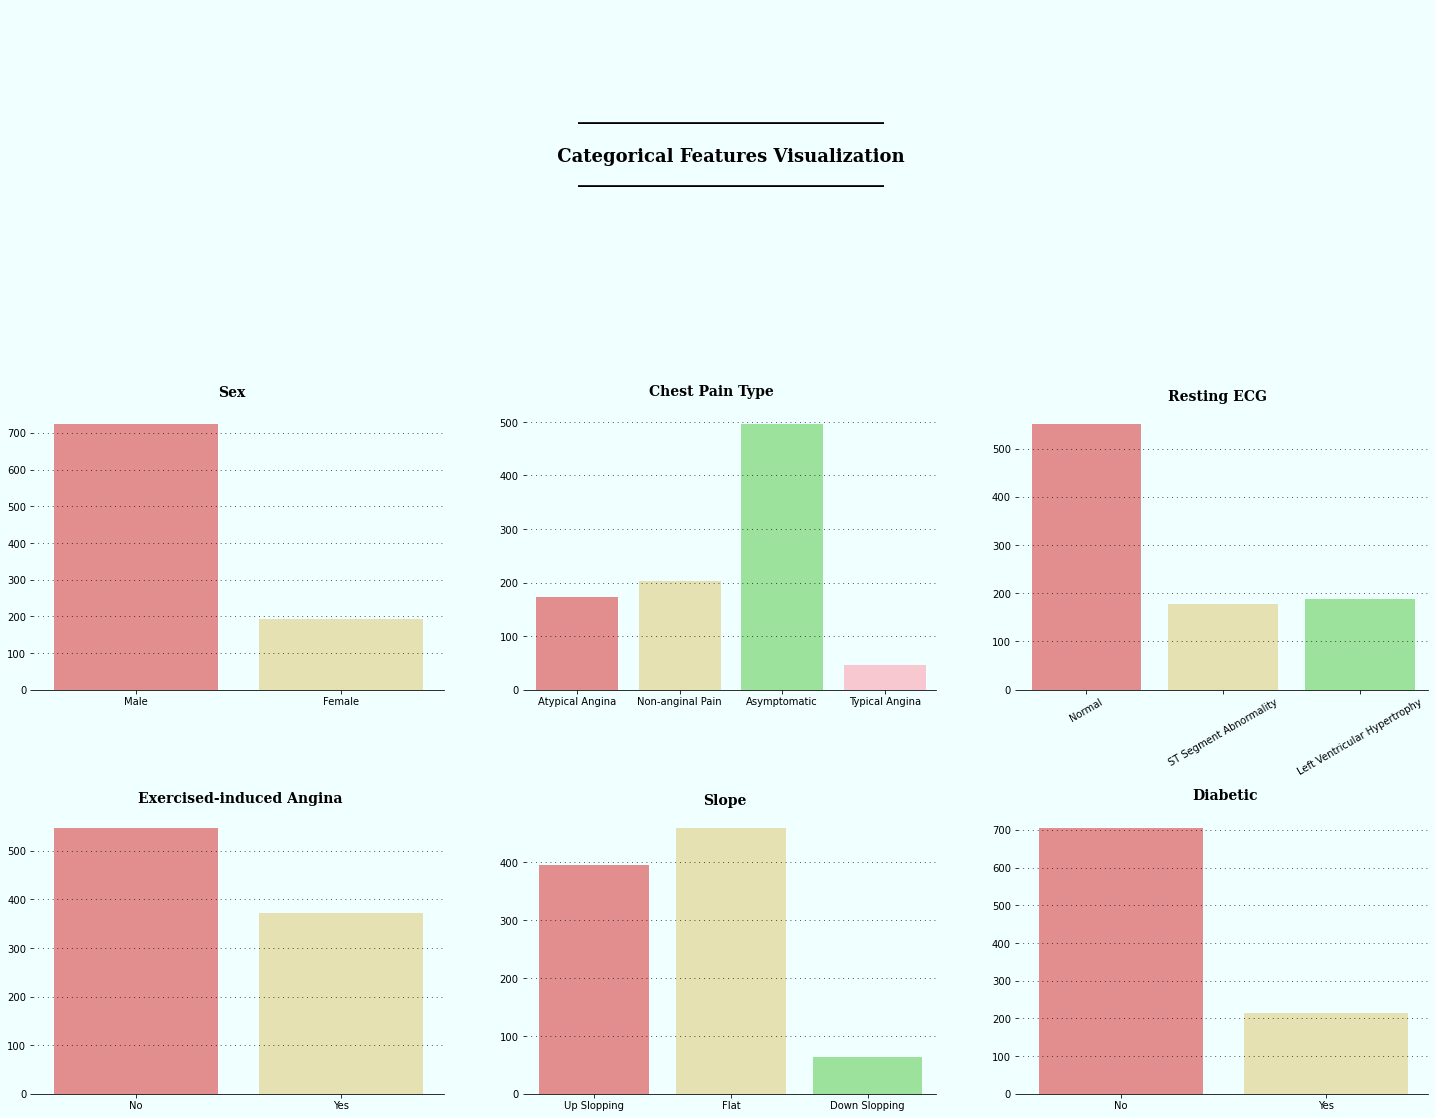

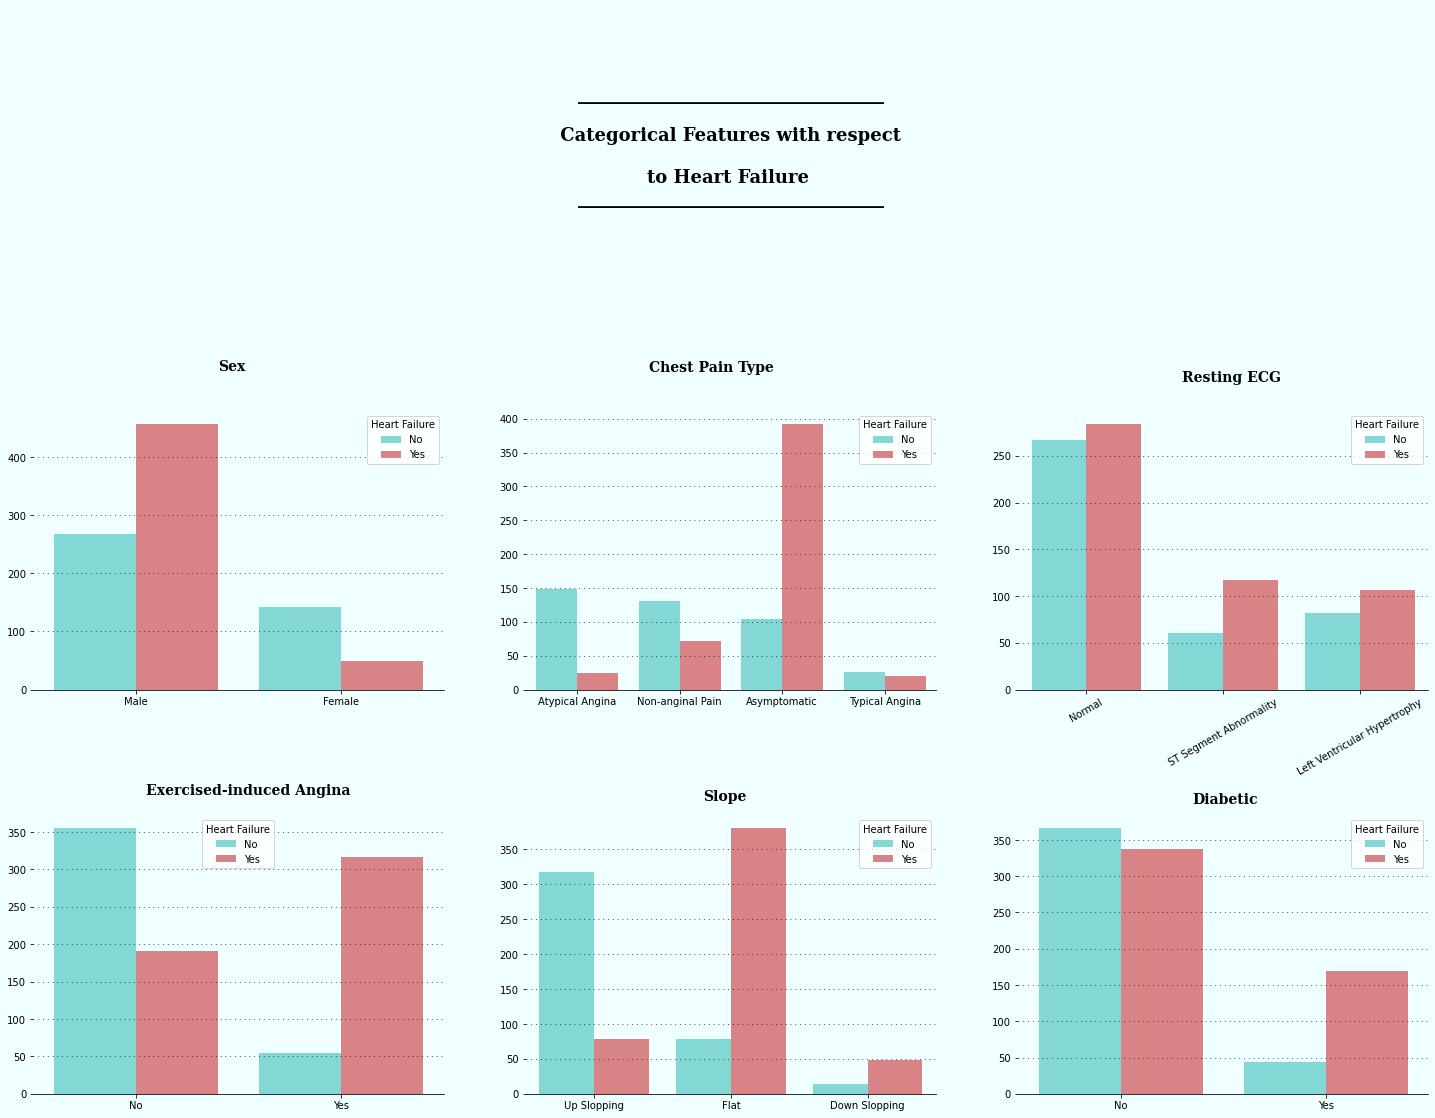

In [23]:
complete_figure = [fig1, fig2, fig3, fig4, fig5, fig6]

color = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "#20B2AA"]

fig_count = 0

while fig_count < 2:
    display (complete_figure[fig_count])
    fig_count += 1

for item in cat_data:
    plot_pie(item)

count = 0

while count < 6:
    plot_cross_tab = [cat_data[count], output[0]]
    color_map = sns.light_palette(color[count], as_cmap = True)
    cross_tab = (round(pd.crosstab(dst_anno[plot_cross_tab[0]], dst_anno[plot_cross_tab[1]], normalize = 'columns') * 100, 2)).style.background_gradient(cmap = color_map)
    display(cross_tab)
    count += 1

## Conclusion

---

1. There were more than twice in Male patients than Female patients, although the number of Male and Female patients diagnosed with heart failure were about the same.
2. Chest Pain Type could be a potential clinical indication of Heart Failure albeit having greater complications since the underlying cause of angina could have plentiful varieties!
    * Interesting enough, asymptomatic pain appeared to have the highest risk of heart failure.
3. Resting ECG might not be a good clinical indication in this case as not much is know about the reading (leads that are present with abnormalitites were missing!)
    * All 3 classes had almost the same risk of heart failure, making it hard to make predicitions based on this criterion!
4. Ischemia is extremely likely to be the root cause if the ST segment is Down Slopping, which in accordance which the data there are only very few reported cases of Down Slopping ST segment, making it more complicated to identify the presence of heart failure.
    * Interestingly enough, Up Slopping and Flat ST depression are reported predominantly.
    * Another additional fact to add value to the prediction model is that Up Slopping is largely a normal finding in strain test exercises, provided that the T Wave is NOT inverted. Even mere hyperventillation could cause similar up slopping, thus making modelling complicated to be based on this criterion without information on the T Wave.
    * However, it seemed that patients with Up Slopping ST Segment were likely to have heart failure whereas patients with Flat  ST Segment  are very unlikely to have heart failure, making this an ideal criterion for heart failure detection.
7. Diabetes is notibly a poor clinical indication as non-diabetic patients has almost equal risk of heart failure. The trend stays true even for diabetic patients!

---

##### [Back to Top](#backtop)

<a id = "Chapter2.2.2"> </a>
### 4.2.2 Univariate Analysis (Continuous Features)

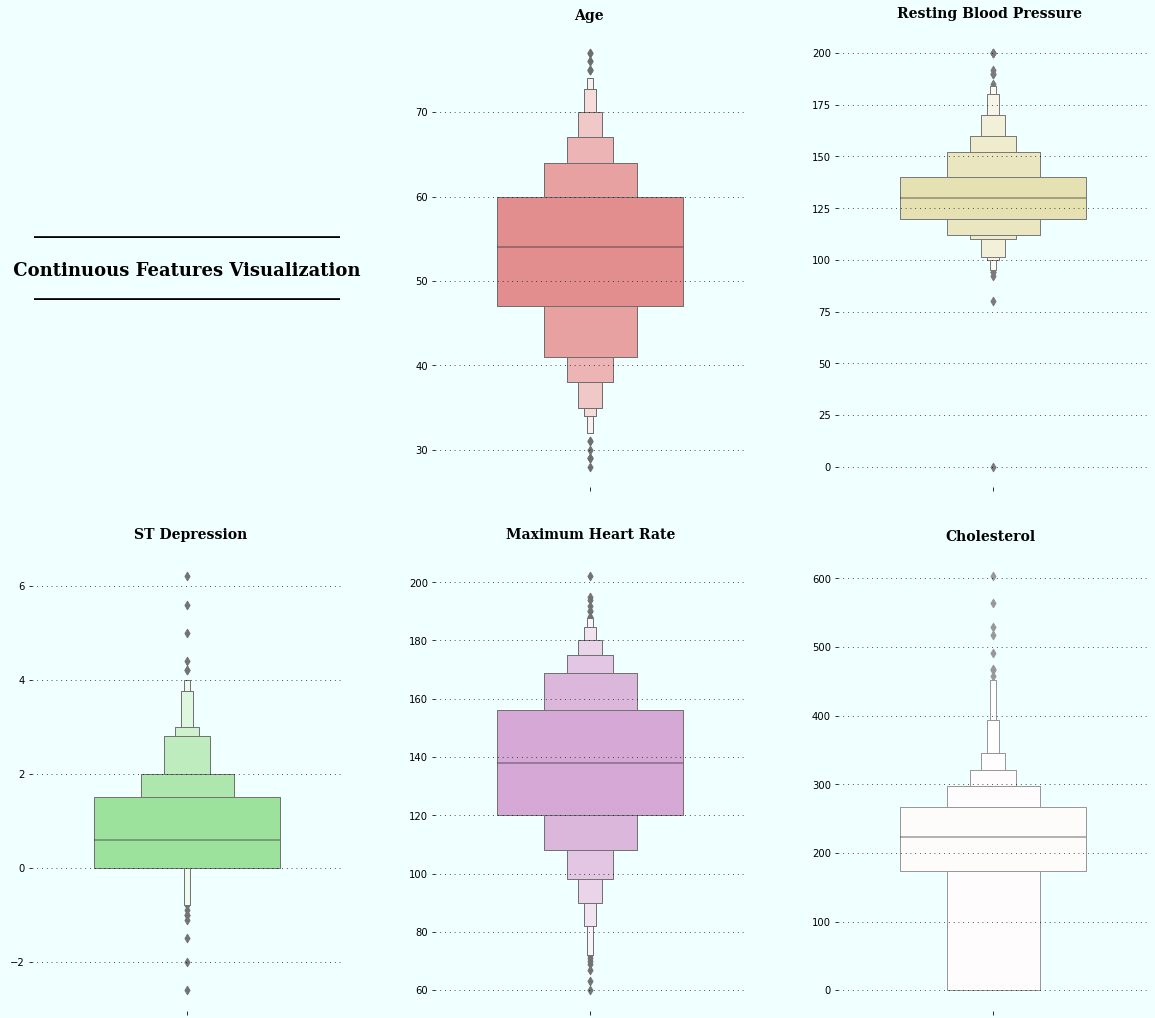

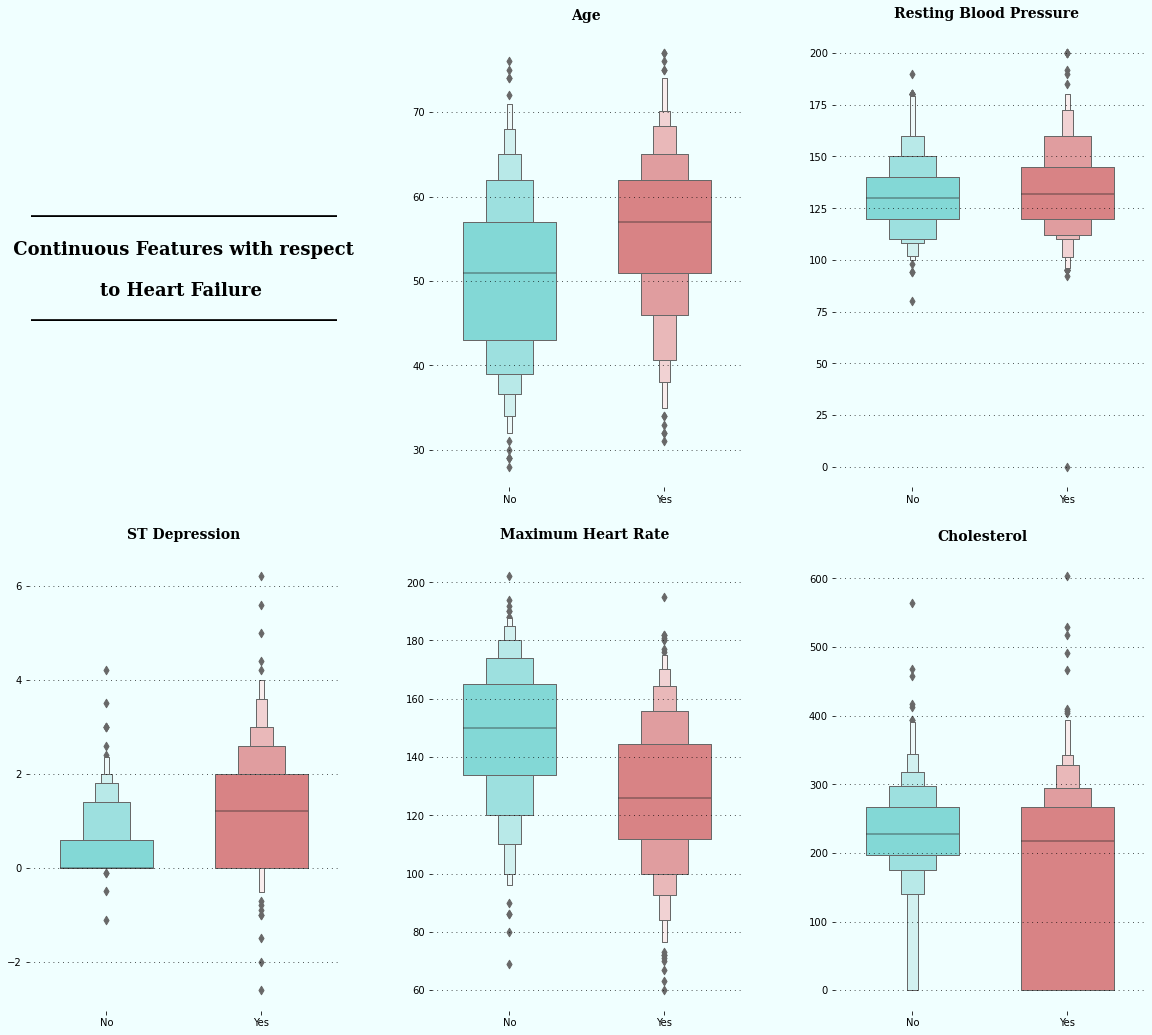

In [24]:
fig_count = 2

while fig_count < 4:
    display (complete_figure[fig_count])
    fig_count += 1

for item in con_data:
    plot_histogram(item)

## Conclusion

---

1. It is counter-intuitaive to have elderly having lower risk of heart failure as elderly over the age of 60 reportedly having less risk of heart failure!
2. Resting blood pressure and cholesterol may potentially be a poor clinical indication as the risk of heart failure is almost the same.
3. ST Depression showed a trend in which a smaller depression in the ST segment Depression would typicallt present a greater risk of heart failure, much to our counter-inituition. 
    * In addition to that, the specific lead on which this observation was maded was not mentioned, the usability of this feature thus remained questionable!
4. Maximum Heart Rate acheived after exercise could potentially be a great clinical indication as it is intuitive that higher heart rate may have a higher chance of over-exerting the heart and resulting in internal hemorrhage from ruptured coronary arteries!

---

##### [Back to Top](#backtop)

<a id = "Chapter2.2.3"> </a>
### 4.2.3 Multivariate Analysis

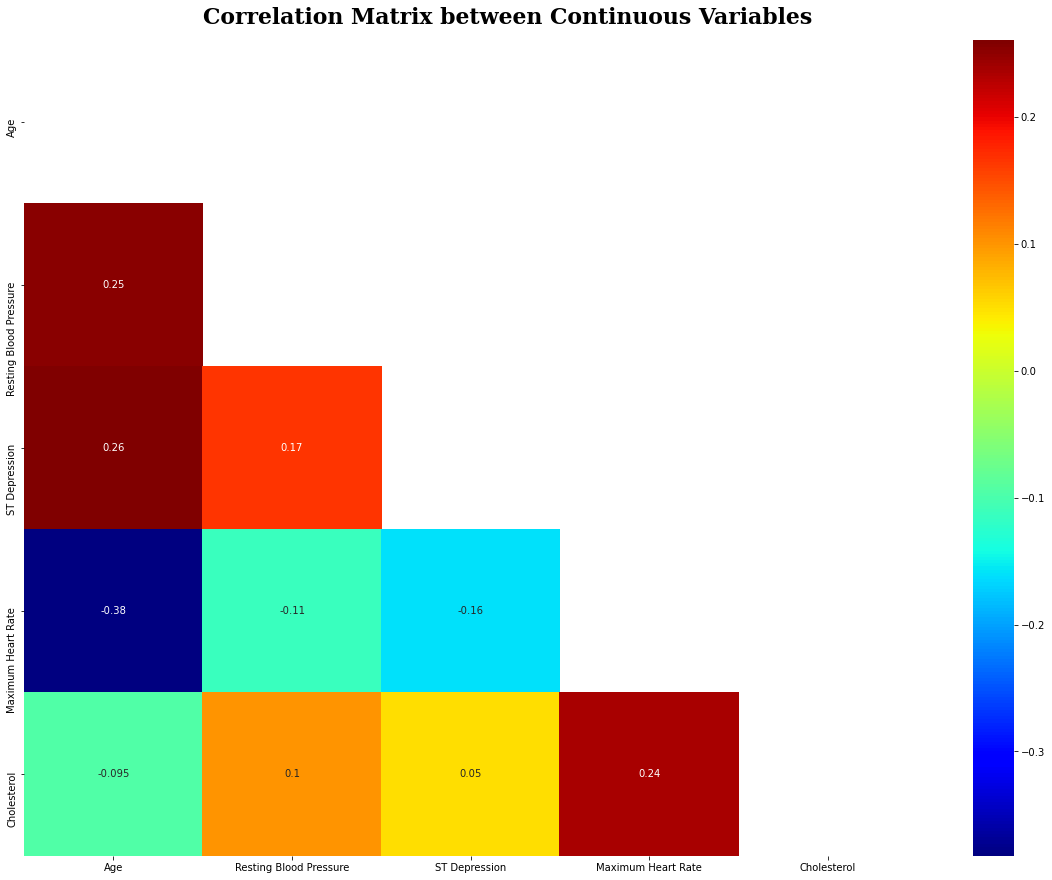

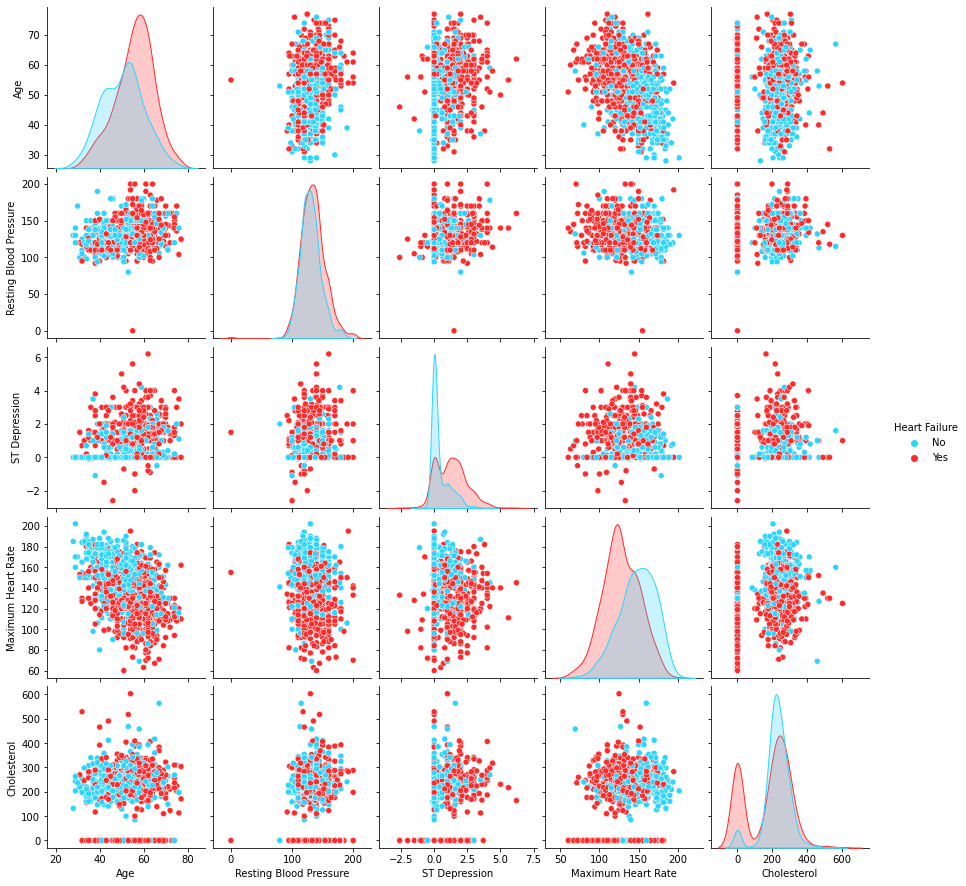

In [25]:
display (complete_figure[4])

sns.pairplot(dst_anno, hue = 'Heart Failure', vars = con_data, palette = ["#2BD5FF", "#FF2B2B"])

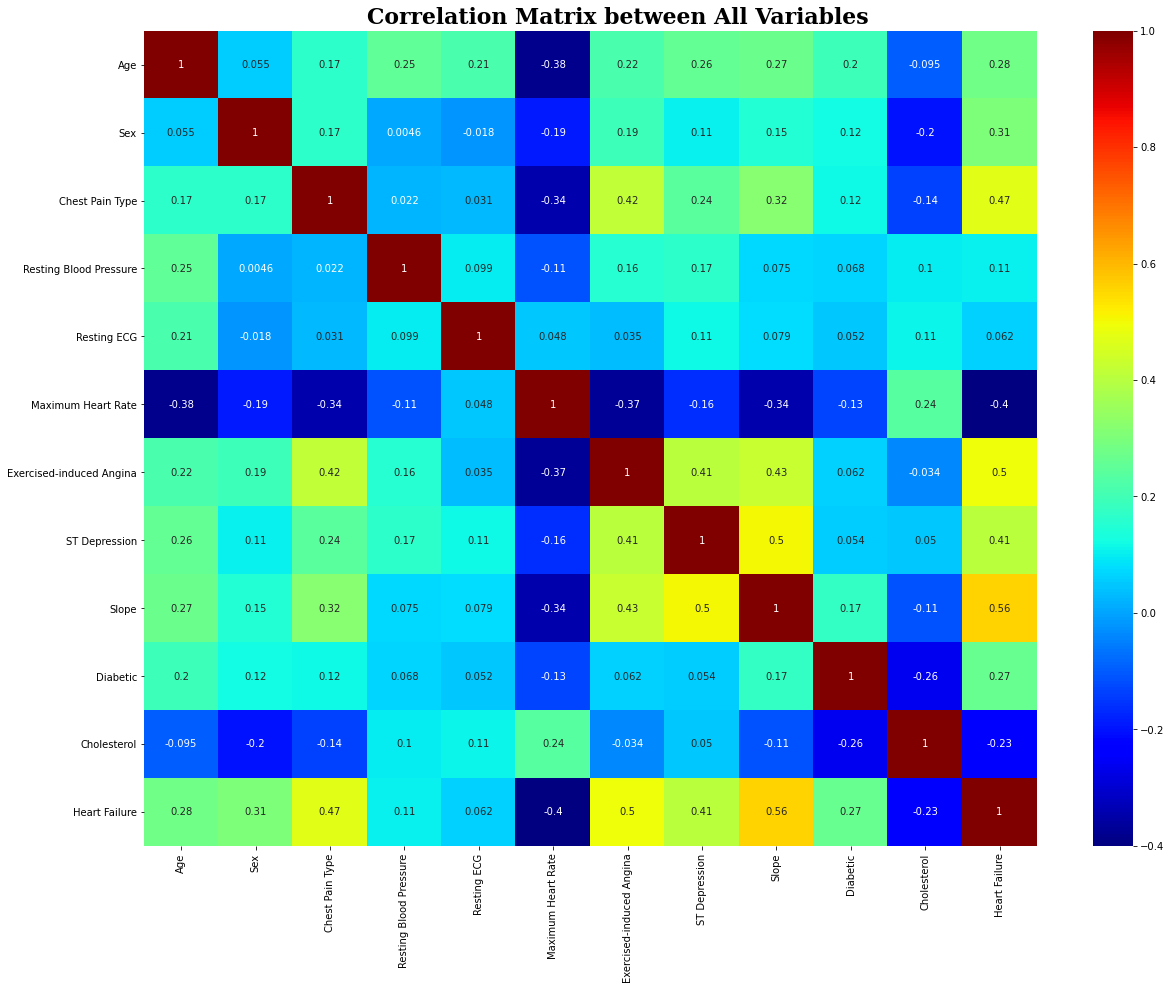

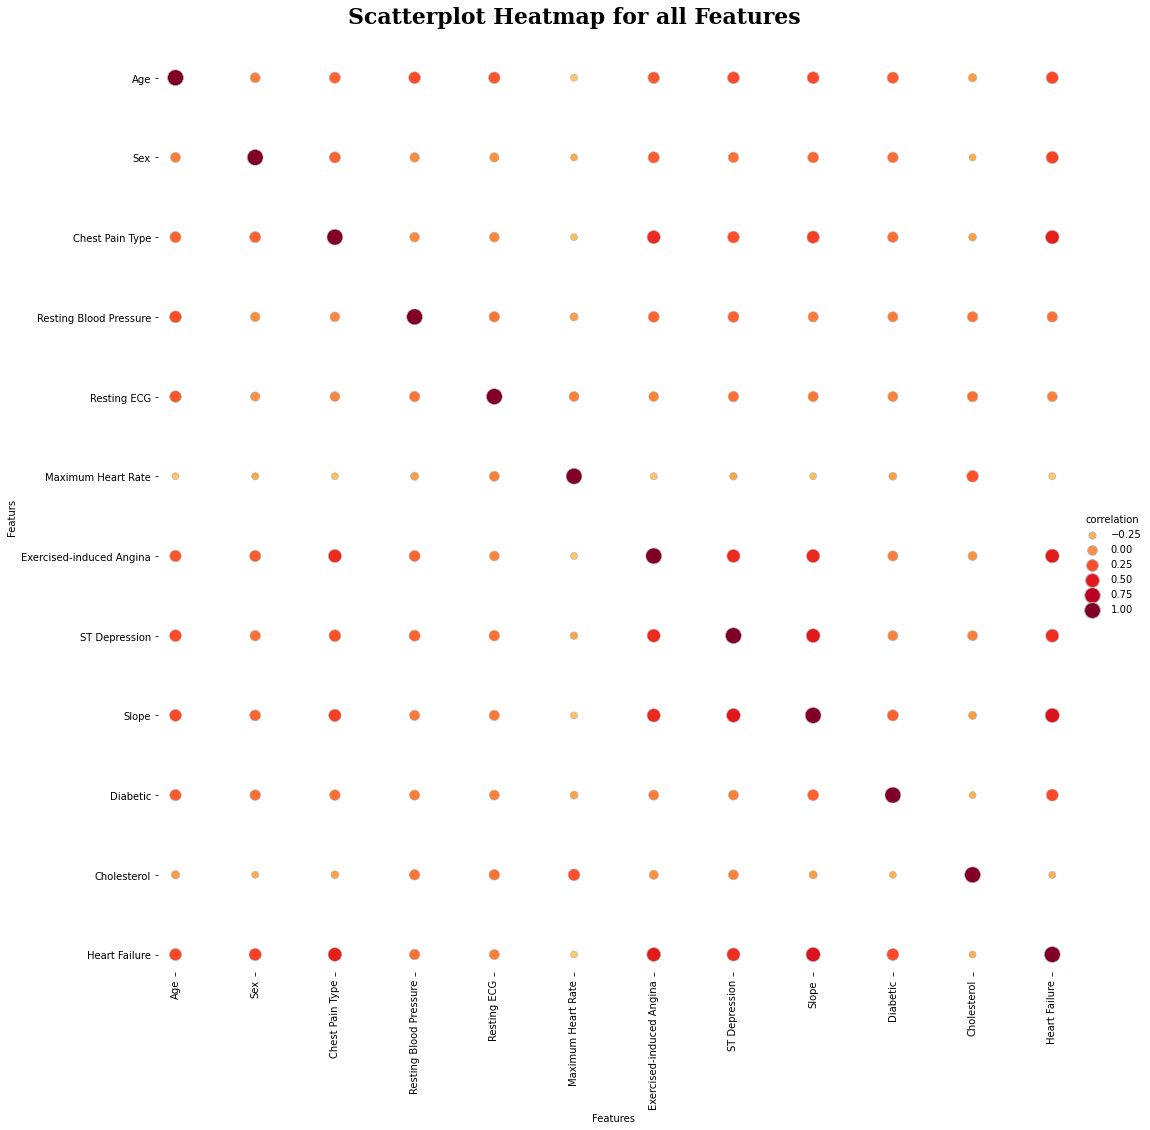

<Figure size 1440x1080 with 0 Axes>

In [26]:
display (complete_figure[5])

corr_mat = dst.corr().stack().reset_index(name = "correlation")
g = sns.relplot(data=corr_mat, x="level_0", y="level_1", hue="correlation", size="correlation", palette="YlOrRd", hue_norm=(-1, 1), edgecolor=".7", height=15, sizes=(50, 250), size_norm=(-.2, .8),)
g.set(xlabel="Features", ylabel="Featurs", aspect="equal")
g.fig.suptitle('Scatterplot Heatmap for all Features', fontsize = 22, fontweight = 'bold', fontfamily = 'serif', color = "#000000")
plt.figure(figsize=(20,15))
g.despine(left = True, bottom = True)
g.ax.margins(0.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

## Conclusion

---
1. The correlation matrix on all variables reveal the potential correlation between Heart Failure and Exercise-induced Angina, Chest Pain Type, Maximum Heart Rate, ST Depression and Slope.
2. There was no apparent linear correlation between the continuous variables according to the scatterplot heatmap.
---

##### [Back to Top](#backtop)

<a id = "Chapter3"> </a>

---
# Chapter 5: Model Building
---

<a id = "Chapter3.1"> </a>
## 5.1 Data Preprocessing

In [27]:
dst_con = dst[con_data]

In [28]:
z_score = np.abs(stats.zscore(dst_con))

threshold = 3
num_outlier = (z_score > 3).sum()
num_outlier

Age                       0
Resting Blood Pressure    8
ST Depression             7
Maximum Heart Rate        1
Cholesterol               3
dtype: int64

In [29]:
dst = dst[(z_score < 3).all(axis = 1)]

In [30]:
X = dst.drop(['Heart Failure'], axis = 1)
y = dst['Heart Failure']

In [31]:
scaler = MinMaxScaler()
X[con_data] = scaler.fit_transform(X[con_data])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

##### [Back to Top](#backtop)

<a id = "Chapter3.2"> </a>
## 5.2 Base Model

Choices of models were evaluated from the following papers:

1. Abdullah, A. S., 2012. A Data mining Model for predicting the Coronary Heart Disease using Random Forest Classifier. _Recent trends in Computational Methods, Communication and Controls_, ICON3C(3), pp. 22–25. [Accessed Here](https://www.ijcaonline.org/proceedings/icon3c/number3/6020-1021)  
  

2. Almustafa, K. M., 2020. Prediction of heart disease and classifiers’ sensitivity analysis. _BMC Bioinformatics_, 21(278), pp. 1-18. [Accessed Here](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-03626-y)    
  

3. Salhi, D. E., Tari, A., Kechadi, M. T., 2020. Using Machine Learning for Heart Disease Prediction. _Advances in Computing Systems and Applications_, 3(30), pp. 70-81. [Accessed Here](https://www.researchgate.net/publication/349470771_Using_Machine_Learning_for_Heart_Disease_Prediction)   
  
  
4. Durairaj, M., Revathi, V., 2015. Prediction Of Heart Disease Using Back Propagation MLP Algorithm. _International Journak of Scientific and Technology Research_, 4(8), pp. 235–239. [Accessed Here](https://www.ijstr.org/final-print/aug2015/Prediction-Of-Heart-Disease-Using-Back-Propagation-Mlp-Algorithm.pdf)
  
  
5. Fatima, M., Pasha, M., 2017. Survey of machine learning algorithms for disease diagnostic. _J Intell Learn Syst Appl_, 9(1), pp. 1. [Accessed Here](https://www.scirp.org/journal/paperinformation.aspx?paperid=73781)
  
  
6. Kota, P., Madenahalli, A., Guturi, R., Nukala, B. T., Nagaraj, S., Kota, S., Neeli, P. C., 2021. Heart disease classification comparison among patients and normal subjects using machine learning and artificial neural network techniques. _International Journal of Biosensors & Bioelectronics_, 7(3), pp. 77-79. [Accessed Here](https://medcraveonline.com/IJBSBE/heart-disease-classification-comparison-among-patients-and-normal-subjects-using-machine-learning-and-artificial-neural-network-techniques.html)     
  
  
7. Marateb, H. R., Goudarzi, S., 2015. A noninvasive method for coronary artery diseases diagnosis using a clinically-interpretable fuzzy rule-based system. _J Res Med Sci_, 20(214), pp. 23. [Accessed Here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4468223/)  

<a id = "basemodellist"> </a>

In [33]:
def BaseModelList():
    
    BaseModels = []
    
    BaseModels.append(('Logistic Regression\t\t\t', LogisticRegression()))
    BaseModels.append(('K Nearest Neighbor\t\t\t', KNeighborsClassifier(5)))
    BaseModels.append(('Naive Bayes\t\t\t\t', GaussianNB(var_smoothing = 1)))
    BaseModels.append(('Decision Tree\t\t\t\t', DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, random_state = 42)))
    BaseModels.append(('Extra Tree\t\t\t\t', ExtraTreesClassifier(criterion = 'entropy', max_features = 3, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 600, random_state = 42)))
    BaseModels.append(('Random Forest\t\t\t\t', RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 2, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 300, random_state = 42)))
    BaseModels.append(('Support Vector Machine (Linear)\t\t', SVC(kernel = 'linear', C = 1, gamma = 1e-05, random_state = 42)))
    BaseModels.append(('Support Vector Machine (RBF)\t\t', SVC(kernel = 'rbf', C = 2, gamma = 0.05, random_state = 42)))
    BaseModels.append(('Adaptive Boost\t\t\t\t', AdaBoostClassifier()))
    BaseModels.append(('Stochastic Gradient Descent\t\t', SGDClassifier(max_iter=3000, tol = 1e-4)))
    BaseModels.append(('Gradient Boosting\t\t\t', GradientBoostingClassifier(n_estimators = 200, max_depth = 2, max_features = 0.1, random_state = 42)))                                                         
    BaseModels.append(('XGBoost\t\t\t\t\t', XGBClassifier(n_estimators= 90, gamma = 0.3, max_depth = 4, min_child_weight = 1, use_label_encoder = False, eval_metric = 'error')))
    BaseModels.append(('Multiple Learning Perceptron\t\t', MLPClassifier(max_iter = 1100)))
                                                               
    return BaseModels

In [34]:
def BaseModelEva(X_train, y_train, models):

    results = []
    names = []
    
    for name, model in models:
        
        kfold = model_selection.KFold(n_splits=10)
        
        cv_results = model_selection.cross_val_score(model, 
                                                     X_train, 
                                                     y_train, 
                                                     cv = kfold, 
                                                     scoring= 'accuracy')
        results.append(cv_results)
        names.append(name)
        outcome = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(outcome)
         
    return results, outcome

In [35]:
model_list = BaseModelList()
names, results = BaseModelEva(X_train, y_train, model_list)

Logistic Regression			: 0.839847 (0.044518)
K Nearest Neighbor			: 0.828580 (0.032410)
Naive Bayes				: 0.820286 (0.035773)
Decision Tree				: 0.837050 (0.040287)
Extra Tree				: 0.863537 (0.022938)
Random Forest				: 0.864906 (0.029183)
Support Vector Machine (Linear)		: 0.858040 (0.042317)
Support Vector Machine (RBF)		: 0.852465 (0.031511)
Adaptive Boost				: 0.842606 (0.039437)
Stochastic Gradient Descent		: 0.775822 (0.099770)
Gradient Boosting			: 0.867664 (0.034314)
XGBoost					: 0.855125 (0.031377)
Multiple Learning Perceptron		: 0.837070 (0.032203)


In [36]:
model_selected = [ExtraTreesClassifier(criterion = 'entropy', max_features = 3, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 600, random_state = 42),
                  RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 2, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 300, random_state = 42),
                  SVC(kernel = 'linear', C = 1, gamma = 1e-05, random_state = 42),
                  SVC(kernel = 'rbf', C = 2, gamma = 0.05, random_state = 42),
                  AdaBoostClassifier(),
                  GradientBoostingClassifier(n_estimators = 200, max_depth = 2, max_features = 0.1, random_state = 42),                                                        
                  XGBClassifier(n_estimators= 90, gamma = 0.3, max_depth = 4, min_child_weight = 1, use_label_encoder = False, eval_metric = 'error'),
                  MLPClassifier(max_iter = 2500)
                 ]

##### [Go to Stacked Ensemble](#Chapter4)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.1"> </a>
### 5.2.1 Logistic Regression

In [37]:
log_clas = LogisticRegression(random_state = 42).fit(X_train, y_train)

y_pred_lgr = log_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_lgr), "\n\n")
print(metrics.classification_report(y_test, y_pred_lgr))

Test accuracy score:  0.8888888888888888 


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        82
         1.0       0.88      0.92      0.90        98

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.2"> </a>
### 5.2.2 K Nearest Neighbuor (KNN)

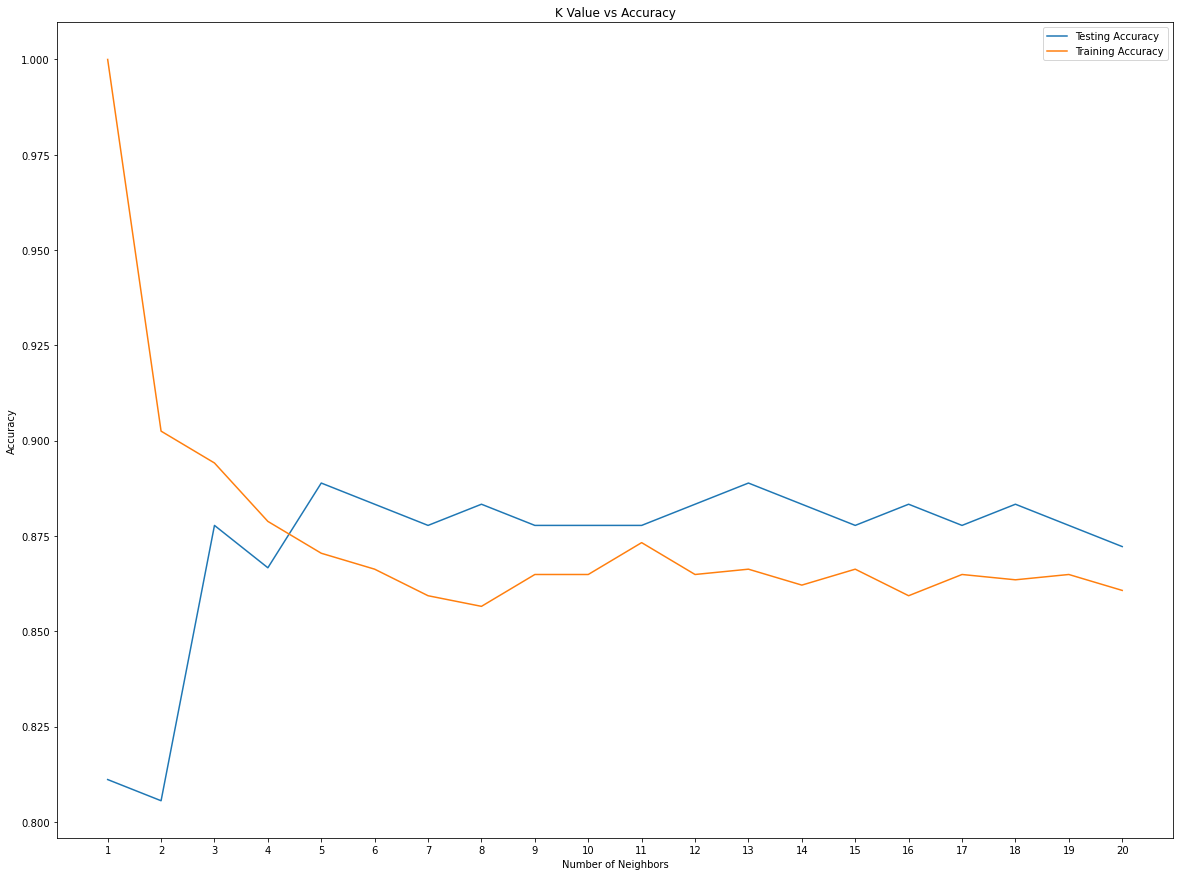


Best accuracy is 0.8888888888888888 with K = 5


In [38]:
neig = np.arange(1, 21)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn_clas = KNeighborsClassifier(n_neighbors = k)
    knn_clas.fit(X_train, y_train)
    train_accuracy.append(knn_clas.score(X_train, y_train))
    test_accuracy.append(knn_clas.score(X_test, y_test))

plt.figure(figsize=[20,15])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K Value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

print("\nBest accuracy is {} with K = {}".format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

In [38]:
knn_clas = KNeighborsClassifier(n_neighbors = 5)
knn_clas.fit(X_train, y_train)
y_pred_knn = knn_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_knn), "\n\n")
print(metrics.classification_report(y_test, y_pred_knn))

Test accuracy score:  0.8888888888888888 


              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87        82
         1.0       0.88      0.93      0.90        98

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.3"> </a>
### 5.2.3 Naive Bayes

In [40]:
nb_clas = GaussianNB()

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(estimator = nb_clas, 
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           verbose= 2
                          )

X_transformed_train = PowerTransformer().fit_transform(X_train)

grid_search = grid_search.fit(X_transformed_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=5.336699231206313e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var

In [40]:
X_transformed_train = PowerTransformer().fit_transform(X_train)

nb_clas = GaussianNB(var_smoothing = 1).fit(X_transformed_train, y_train)

X_transformed_test = PowerTransformer().fit_transform(X_test)
y_pred_nb = nb_clas.predict(X_transformed_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_nb), "\n\n")
print(metrics.classification_report(y_test, y_pred_nb))

Test accuracy score:  0.8833333333333333 


              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87        82
         1.0       0.90      0.89      0.89        98

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.4"> </a>
### 5.2.4 Decision Tree

In [395]:
param_grid = {'criterion': ["entropy", 'gini'],
              'max_depth': [2, 3, 5, 10, 20],
              'min_samples_leaf': [5, 10, 20, 50, 100]     
             }

In [396]:
dec_tree_clas = DecisionTreeClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = dec_tree_clas, 
                           param_grid = param_grid,
                           scoring = "accuracy",
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2
                           )

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
Best Accuracy Score:  0.8357003129890455


In [41]:
dec_tree_clas = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, random_state = 42).fit(X_train,y_train)
y_pred_dectr = dec_tree_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_dectr), "\n\n")
print(metrics.classification_report(y_test, y_pred_dectr))

Test accuracy score:  0.8666666666666667 


              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        82
         1.0       0.92      0.83      0.87        98

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.5"> </a>
### 5.2.5 Extra Tree

In [131]:
param_grid = {'criterion': ['entropy', 'gini'],
              'n_estimators': [400, 500, 600],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5, 6],
              'min_samples_split': [3, 4, 5, 6],
             }

In [132]:
ex_tree_clas =  ExtraTreesClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = ex_tree_clas, 
                           param_grid = param_grid,
                           scoring = 'accuracy', 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best Hyperparameters:  {'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 600}
Best Accuracy Score:  0.8718619246861925


In [42]:
ex_tree_clas = RandomForestClassifier(criterion = 'entropy', max_features = 3, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 600, random_state = 42).fit(X_train,y_train)
y_pred_extr = ex_tree_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_extr), "\n\n")
print(metrics.classification_report(y_test, y_pred_extr))

Test accuracy score:  0.8888888888888888 


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        82
         1.0       0.88      0.92      0.90        98

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.6"> </a>
### 5.2.6 Random Forest

In [136]:
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': [10,15],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5, 6],
              'min_samples_split': [3, 4, 5, 6],
              'n_estimators': [100, 200, 300]
             }

In [137]:
ranfo_clas = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator = ranfo_clas, 
                           param_grid = param_grid,
                           scoring = 'accuracy', 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 300}
Best Accuracy Score:  0.8774349139934913


In [43]:
ranfo_clas = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 2, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 300, random_state = 42).fit(X_train,y_train)
y_pred_rft = ranfo_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_rft), "\n\n")
print(metrics.classification_report(y_test, y_pred_rft))

Test accuracy score:  0.8888888888888888 


              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87        82
         1.0       0.88      0.93      0.90        98

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.71"> </a>
### 5.2.7 Support Vector Machine Linear (SVML)

In [139]:
parameters = [{"C": np.arange(1,10,1), 
               "kernel": ['linear'], 
               "gamma": [0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}]

In [140]:
svm_clas = SVC(random_state = 42)

grid_search = GridSearchCV(estimator = svm_clas, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10, 
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Best Hyperparameters:  {'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}
Best Accuracy Score:  0.8594092331768388


In [73]:
svml_clas = SVC(kernel = 'linear', C = 1, gamma = 1e-05, random_state = 42).fit(X_train,y_train)
y_pred_svml = svml_clas.predict(X_test)


print("Test accuracy score: ", accuracy_score(y_test, y_pred_svml), "\n\n")
print(metrics.classification_report(y_test, y_pred_svml))

Test accuracy score:  0.9 


              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89        82
         1.0       0.89      0.93      0.91        98

    accuracy                           0.90       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.90      0.90      0.90       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.72"> </a>
### 5.2.8 Support Vector Machine RBF (SVMR)

In [142]:
parameters = [{"C": np.arange(1,10,1), 
               "kernel": ['rbf'], 
               "gamma": [0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}]

In [143]:
svm_clas = SVC(random_state = 42)

grid_search = GridSearchCV(estimator = svm_clas, 
                           param_grid = parameters, 
                           scoring = 'accuracy', 
                           cv = 10, 
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Best Hyperparameters:  {'C': 2, 'gamma': 0.05, 'kernel': 'rbf'}
Best Accuracy Score:  0.8580399061032862


In [72]:
svmr_clas = SVC(kernel = 'rbf', C = 2, gamma = 0.05, random_state = 42).fit(X_train,y_train)
y_pred_svmr = svmr_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_svmr), "\n\n")
print(metrics.classification_report(y_test, y_pred_svmr))

Test accuracy score:  0.8777777777777778 


              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        82
         1.0       0.87      0.92      0.89        98

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.88       180
weighted avg       0.88      0.88      0.88       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.8"> </a>
### 5.2.9 Adaptive Boost

In [46]:
adab_clas = AdaBoostClassifier().fit(X_train,y_train)
y_pred_adab = adab_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_adab), "\n\n")
print(metrics.classification_report(y_test, y_pred_adab))

Test accuracy score:  0.8722222222222222 


              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86        82
         1.0       0.88      0.89      0.88        98

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.9"> </a>
### 5.2.10 Stochastic Gradient Descent

In [47]:
sgd_clas = SGDClassifier(max_iter = 3000, tol = 1e-4).fit(X_train,y_train)
y_pred_sgd = sgd_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_sgd), "\n\n")
print(metrics.classification_report(y_test, y_pred_sgd))

Test accuracy score:  0.8666666666666667 


              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86        82
         1.0       0.89      0.87      0.88        98

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



##### [Back to Base Model](#basemodellist)

##### [Back to Top](#backtop)

<a id = "Chapter3.2.10"> </a>
### 5.2.11 Gradient Boosting

In [147]:
param_grid = {'n_estimators' : [100, 200, 300],
              'max_depth': [1, 2, 3],
              'max_features': [0.1, 0.2, 0.3] 
              }

In [148]:
gb_clas = GradientBoostingClassifier(random_state = 42)


grid_search = GridSearchCV(estimator = gb_clas, 
                           param_grid = param_grid,
                           scoring="accuracy",
                           cv = 10,
                           verbose = 2,
                           n_jobs= -1, 
                           )

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Hyperparameters:  {'max_depth': 2, 'max_features': 0.1, 'n_estimators': 200}
Best Accuracy Score:  0.8746283255086071


In [48]:
gb_clas = GradientBoostingClassifier(n_estimators = 200, max_depth = 2, max_features = 0.1, random_state = 42).fit(X_train, y_train)
y_pred_gb = gb_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_gb), "\n\n")
print(metrics.classification_report(y_test, y_pred_gb))

Test accuracy score:  0.8833333333333333 


              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        82
         1.0       0.87      0.92      0.90        98

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



##### [Back to Top](#backtop)

##### [Back to Base Model](#basemodellist)

<a id = "Chapter3.2.11"> </a>
### 5.2.12 XGBoost

In [150]:
param_grid = {'n_estimators' : [90, 100, 110],
              'max_depth': [3, 4],
              "min_child_weight": [1, 2],
              "gamma": [0.25, 0.3, 0.35],
              }

In [151]:
xgb_clas =  XGBClassifier(use_label_encoder = False, eval_metric = 'error')

grid_search = GridSearchCV(estimator = xgb_clas, 
                           param_grid = param_grid,
                           scoring="accuracy",
                           cv = 10,
                           verbose = 2,
                           n_jobs= -1, 
                           )

grid_search = grid_search.fit(X_train, y_train)

best_acc = grid_search.best_score_
best_para = grid_search.best_params_

print("Best Hyperparameters: ", best_para)
print("Best Accuracy Score: ", best_acc)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Hyperparameters:  {'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 90}
Best Accuracy Score:  0.8593505477308294


In [49]:
xgb_clas = XGBClassifier(n_estimators= 90, gamma = 0.3, max_depth = 4, min_child_weight = 1, use_label_encoder = False, eval_metric = 'error').fit(X_train,y_train)
y_pred_xgb = xgb_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_xgb), "\n\n")
print(metrics.classification_report(y_test, y_pred_xgb))

Test accuracy score:  0.8555555555555555 


              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        82
         1.0       0.88      0.86      0.87        98

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.85       180
weighted avg       0.86      0.86      0.86       180



##### [Back to Top](#backtop)

##### [Back to Base Model](#basemodellist)

<a id = "Chapter3.2.12"> </a>
### 5.2.13 Multiple Layer Perceptron (MLP)

In [50]:
mlp_clas = MLPClassifier(max_iter = 2500, random_state = 42).fit(X_train,y_train)
y_pred_mlp = mlp_clas.predict(X_test)

print("Test accuracy score: ", accuracy_score(y_test, y_pred_mlp), "\n\n")
print(metrics.classification_report(y_test, y_pred_mlp))

Test accuracy score:  0.8666666666666667 


              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84        82
         1.0       0.84      0.94      0.88        98

    accuracy                           0.87       180
   macro avg       0.88      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180



##### [Back to Top](#backtop)

##### [Back to Base Model](#basemodellist)

<a id = "Chapter4"> </a>

---
# Chapter 6: Stacked Ensemble
---

<a id = "Chapter4.1"> </a>
## 6.1 Stacked Model Buidling

In [51]:
S_train, S_test = stacking(model_selected,                   
                           X_train, 
                           y_train, 
                           X_test,
                           regression = False, 
                           mode='oof_pred_bag', 
                           metric=accuracy_score, 
                           n_folds=5, 
                           stratified=True,
                           shuffle=True, 
                           random_state = 42,
                           verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [8]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.86805556]
    fold  1:  [0.85416667]
    fold  2:  [0.88194444]
    fold  3:  [0.88811189]
    fold  4:  [0.86013986]
    ----
    MEAN:     [0.87048368] + [0.01281591]
    FULL:     [0.87047354]

model  1:     [RandomForestClassifier]
    fold  0:  [0.84722222]
    fold  1:  [0.84722222]
    fold  2:  [0.90972222]
    fold  3:  [0.86713287]
    fold  4:  [0.88111888]
    ----
    MEAN:     [0.87048368] + [0.02343583]
    FULL:     [0.87047354]

model  2:     [SVC]
    fold  0:  [0.84722222]
    fold  1:  [0.82638889]
    fold  2:  [0.87500000]
    fold  3:  [0.85314685]
    fold  4:  [0.83216783]
    ----
    MEAN:     [0.84678516] + [0.01712550]
    FULL:     [0.84679666]

model  3:     [SVC]
    fold  0:  [0.85416667]
    fold  1:  [0.81944444]
    fold  2:  [0.86805556]
    fold  3:  [0.87412587]
    fo

In [56]:
model_final = MLPClassifier(max_iter = 2500).fit(S_train, y_train)
y_pred = model_final.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.91111111]


Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Stacked Classifier  0.911111       0.91     0.928571     0.890244   

   F1 Score       ROC  Log Loss  Mathew Correlation coefficent  
0  0.919192  0.909408  3.070153                       0.820656

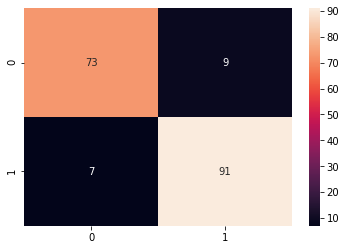

In [57]:
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot = True)

TN = con_mat[0][0]
FN = con_mat[1][0]
TP = con_mat[1][1]
FP = con_mat[0][1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
sensi = recall_score(y_test, y_pred)
speci = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
loglos = log_loss(y_test, y_pred)
mathew = matthews_corrcoef(y_test, y_pred)

model_outcome = pd.DataFrame([['Stacked Classifier',
                                acc, 
                                prec,
                                sensi,
                                speci, 
                                f1,
                                roc, 
                                loglos,
                                mathew]],

                                columns = ['Model', 
                                           'Accuracy',
                                           'Precision', 
                                           'Sensitivity',
                                           'Specificity', 
                                           'F1 Score',
                                           'ROC',
                                           'Log Loss',
                                           'Mathew Correlation coefficent'])

model_outcome

##### [Back to Top](#backtop)

<a id = "Chapter4.2"> </a>
## 6.2 Model Comparison

In [58]:
data = {'Logistic Regression': y_pred_lgr,
        'K Nearest Neighbour': y_pred_knn,
        'Naive Bayes': y_pred_nb,
        'Decision Tree': y_pred_dectr,
        'Extra Tree': y_pred_extr,
        'Random Forest' : y_pred_rft,
        'Support Vector Machine (Linear)': y_pred_svml,
        'Support Vector Machine (RBF)': y_pred_svmr,
        'Adaptive Boost': y_pred_adab,
        'Stochastic Gradient Descent': y_pred_sgd,
        'Gradient Boost': y_pred_gb,
        'XGBoost': y_pred_xgb,
        'Multiple Learning Perceptron': y_pred_mlp
       }

models = pd.DataFrame(data) 

for column in models:
    
    con_mat = confusion_matrix(y_test, models[column])
    
    TN = con_mat[0][0]
    FN = con_mat[1][0]
    TP = con_mat[1][1]
    FP = con_mat[0][1]
    
    acc = accuracy_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    sensi = recall_score(y_test, models[column])
    speci = TN / (TN + FP)
    f1 = f1_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    loglos = log_loss(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])

    results = pd.DataFrame([[column,
                             acc, 
                             prec,
                             sensi,
                             speci, 
                             f1,
                             roc, 
                             loglos,
                             mathew]],

                             columns = ['Model', 
                                        'Accuracy',
                                        'Precision', 
                                        'Sensitivity',
                                        'Specificity', 
                                        'F1 Score',
                                        'ROC',
                                        'Log Loss',
                                        'Mathew Correlation coefficent'])
    
    model_outcome = model_outcome.append(results, ignore_index = True)

model_outcome

Model  Accuracy  Precision  Sensitivity  \
0                Stacked Classifier  0.911111   0.910000     0.928571   
1               Logistic Regression  0.888889   0.882353     0.918367   
2               K Nearest Neighbour  0.888889   0.875000     0.928571   
3                       Naive Bayes  0.883333   0.896907     0.887755   
4                     Decision Tree  0.866667   0.920455     0.826531   
5                        Extra Tree  0.888889   0.882353     0.918367   
6                     Random Forest  0.888889   0.875000     0.928571   
7   Support Vector Machine (Linear)  0.900000   0.892157     0.928571   
8      Support Vector Machine (RBF)  0.877778   0.865385     0.918367   
9                    Adaptive Boost  0.872222   0.878788     0.887755   
10      Stochastic Gradient Descent  0.866667   0.885417     0.867347   
11                   Gradient Boost  0.883333   0.873786     0.918367   
12                          XGBoost  0.855556   0.875000     0.857143   
13     Multiple Learning Perceptron  0.866667   0.836364     0.938776   

    Specificity  F1 Score       ROC  Log Loss  Mathew Correlation coefficent  
0      0.890244  0.919192  0.909408  3.070153                       0.820656  
1      0.853659  0.900000  0.886013  3.837695                       0.775898  
2      0.841463  0.900990  0.885017  3.837700                       0.776438  
3      0.878049  0.892308  0.882902  4.029568                       0.765090  
4      0.914634  0.870968  0.870582  4.605201                       0.738413  
5      0.853659  0.900000  0.886013  3.837695                       0.775898  
6      0.841463  0.900990  0.885017  3.837700                       0.776438  
7      0.865854  0.910000  0.897213  3.453927                       0.798409  
8      0.829268  0.891089  0.873818  4.221468                       0.753853  
9      0.853659  0.883249  0.870707  4.413341                       0.742199  
10     0.865854  0.876289  0.866600  4.605219                       0.731927  
11     0.841463  0.895522  0.879915  4.029582                       0.764844  
12     0.853659  0.865979  0.855401  4.988988                       0.709566  
13     0.780488  0.884615  0.859632  4.605250                       0.734789

In [63]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw = 1.0):
    
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, 
            tpr, 
            linestyle = l, 
            linewidth=lw, 
            label = "%s (area = %.3f)" % (label,roc_auc_score(y_true, y_proba[:,1])))

    
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw = 1.0):
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])
    
    average_precision = average_precision_score(y_test, y_proba[:,1], average = "micro")
    
    ax.plot(recall, precision, label = '%s (average=%.3f)'%(label,average_precision), linestyle = l, linewidth = lw)

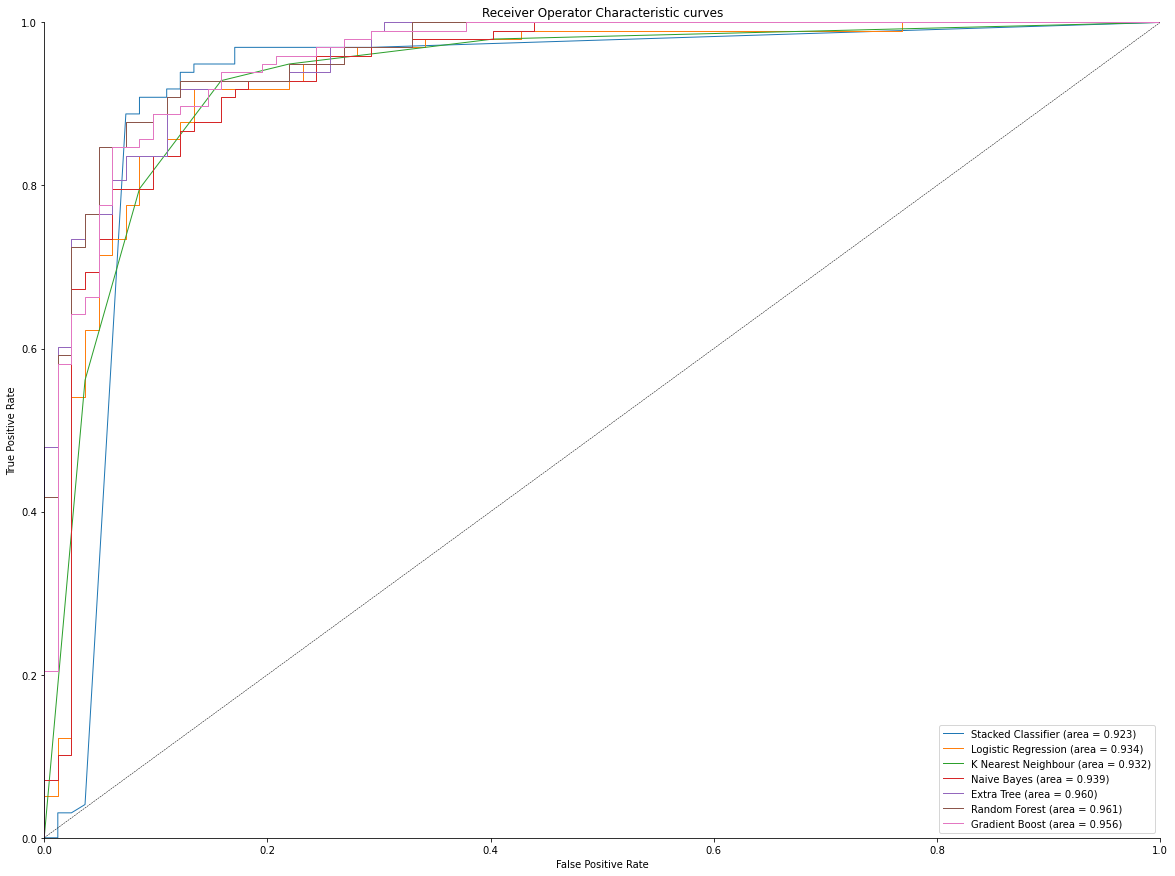

In [64]:
fig, ax = plt.subplots(figsize=(20,15))

roc_auc_plot(y_test, model_final.predict_proba(S_test), label = 'Stacked Classifier', l = '-')
roc_auc_plot(y_test, log_clas.predict_proba(X_test), label = 'Logistic Regression', l = '-')
roc_auc_plot(y_test, knn_clas.predict_proba(X_test), label = 'K Nearest Neighbour', l = '-')
roc_auc_plot(y_test, nb_clas.predict_proba(X_test), label = 'Naive Bayes', l = '-')
roc_auc_plot(y_test, ex_tree_clas.predict_proba(X_test), label = 'Extra Tree', l = '-')
roc_auc_plot(y_test, ranfo_clas.predict_proba(X_test), label = 'Random Forest', l = '-')
roc_auc_plot(y_test, gb_clas.predict_proba(X_test), label = 'Gradient Boost', l = '-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

##### [Back to Top](#backtop)

<a id = "Chapter4.3"> </a>
## 6.3 Saving the Model

In [62]:
filename = 'HFD_model.pkl'
joblib.dump(model_final, filename)

['HFD_model.pkl']

In [82]:
model_loaded = joblib.load('HFD_model.pkl')

In [83]:
y_pred = model_loaded.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.91111111]


##### [Back to Top](#backtop)

<a id = "Chapter5"> </a>

---
# Chapter 7: Feature Evaluation
---

<a id = "Chapter5.1"> </a>
## 7.1 SHAP Analysis

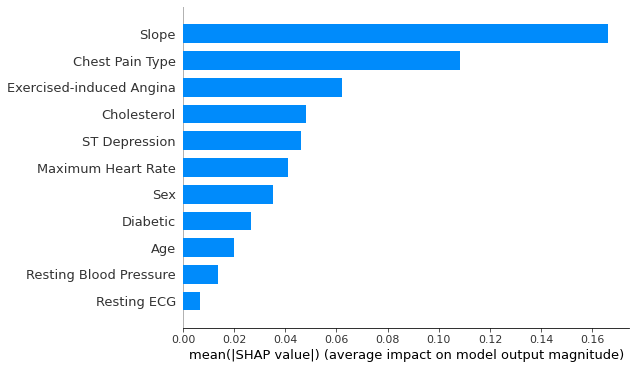

In [129]:
tree_explainer = shap.TreeExplainer(ex_tree_clas)
shap_values = tree_explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type = "bar")

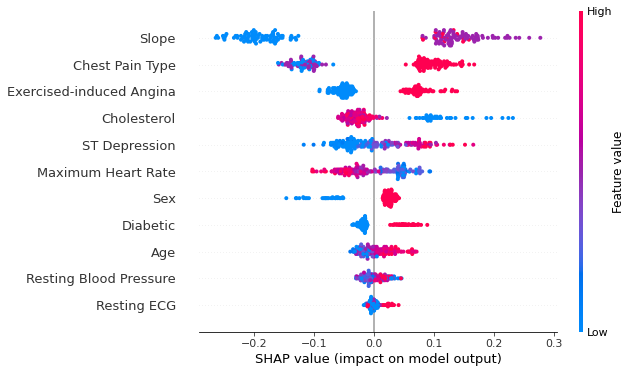

In [118]:
shap.summary_plot(shap_values[1], X_test)

In [138]:
feature_list = [item for item in X_test.columns]
pdp_data = ['Sex', 'Age', 'Chest Pain Type', 'Resting Blood Pressure', 'Resting ECG', 'Maximum Heart Rate', 'Exercised-induced Angina', 'ST Depression', 'Slope', 'Diabetic', 'Cholesterol']

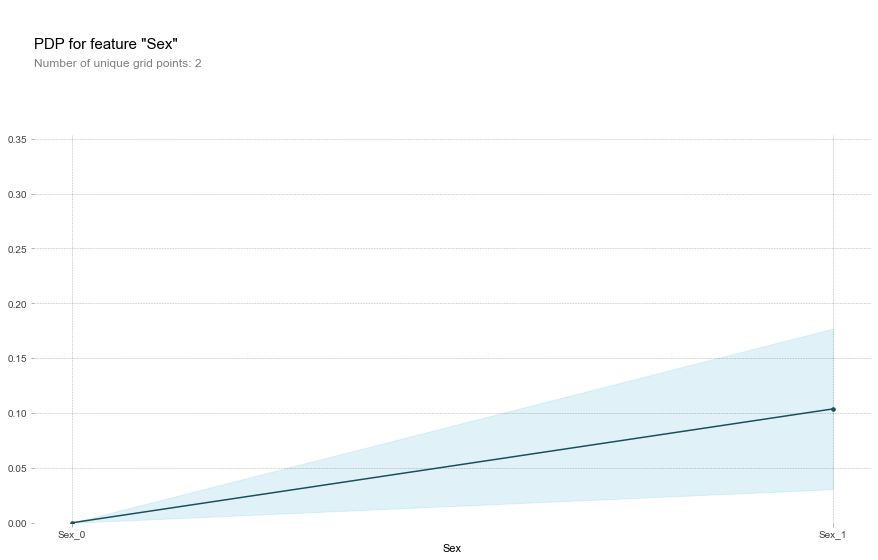

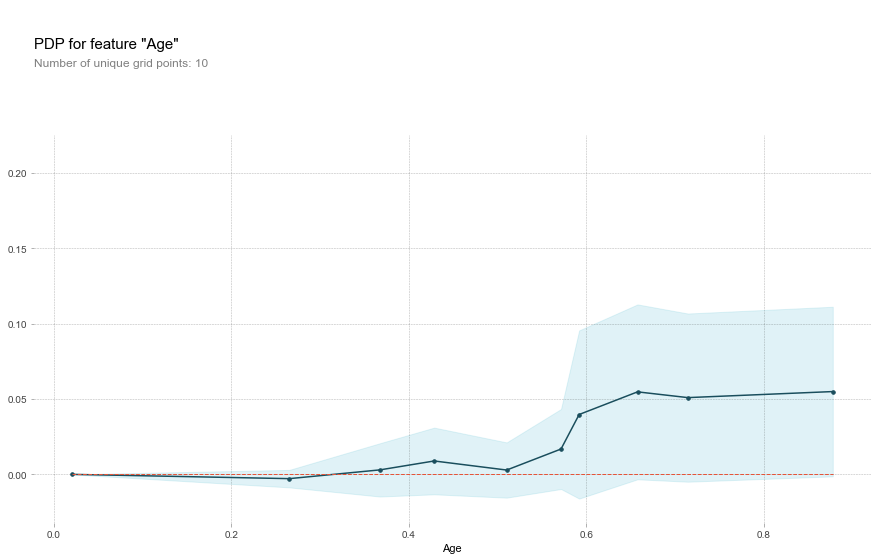

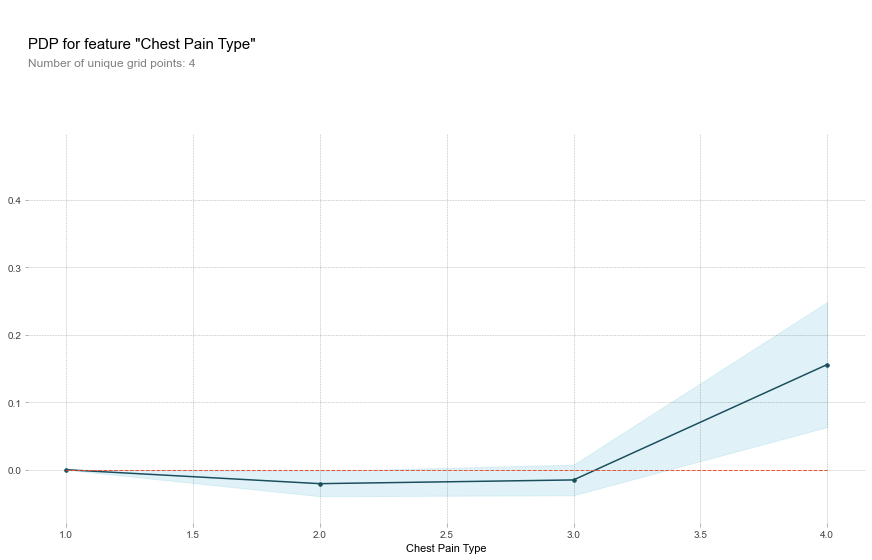

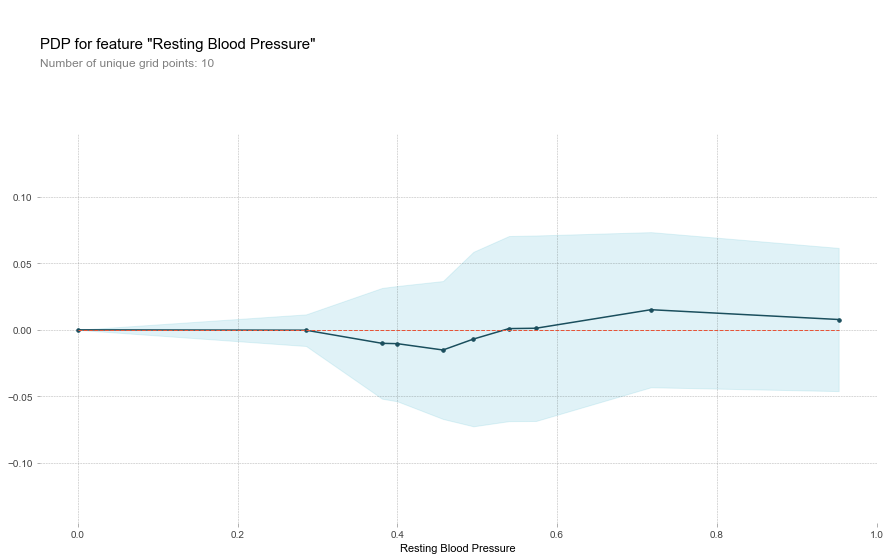

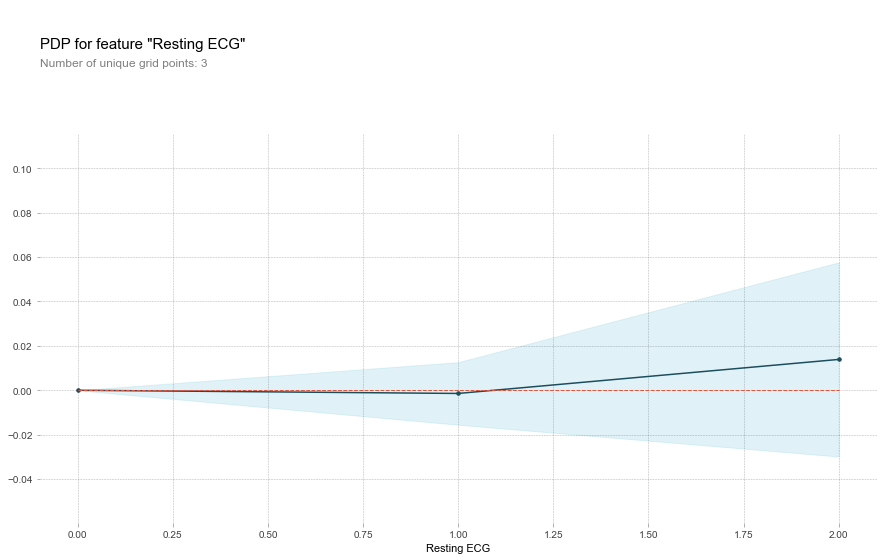

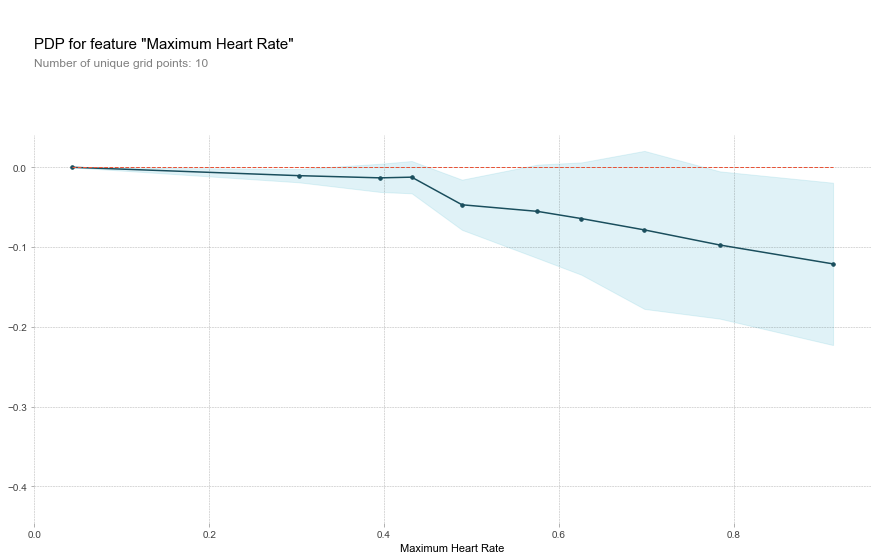

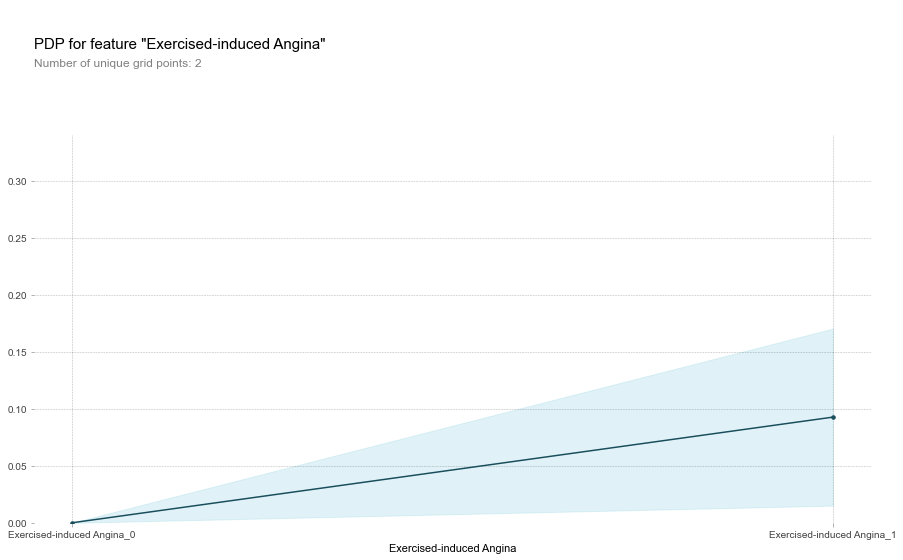

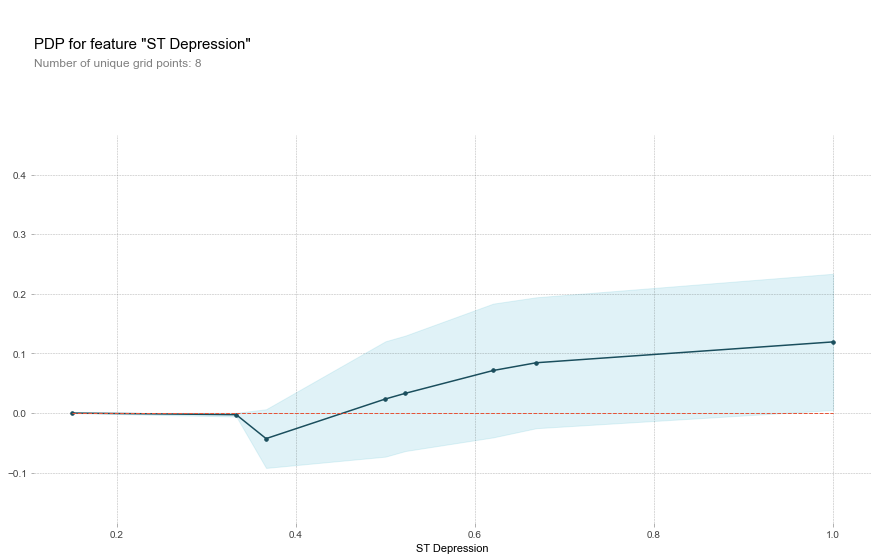

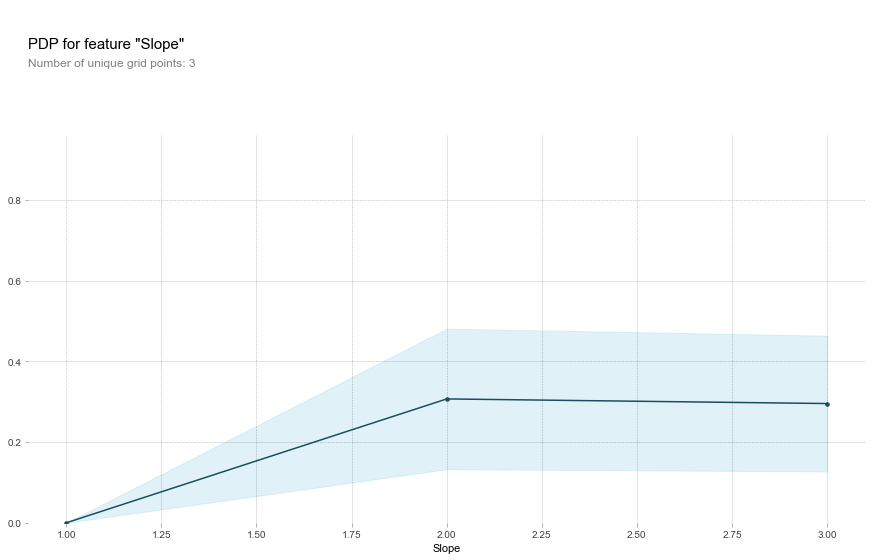

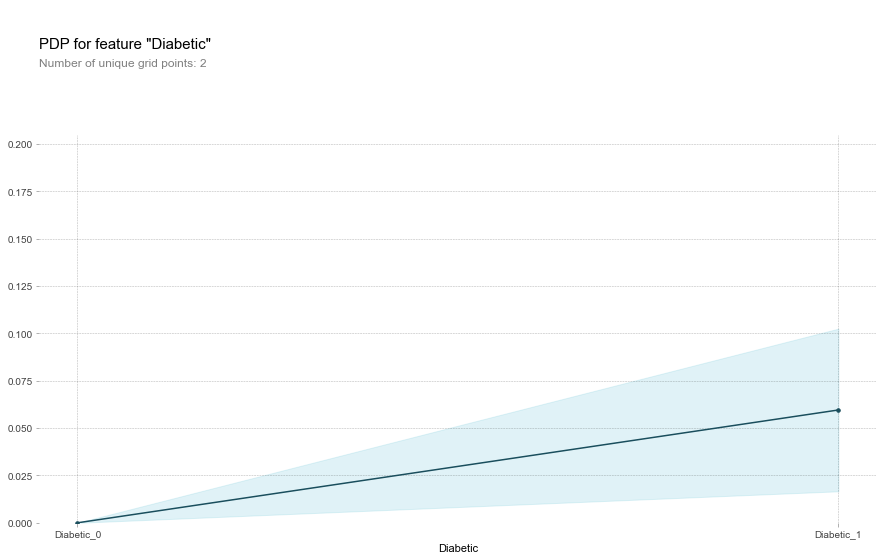

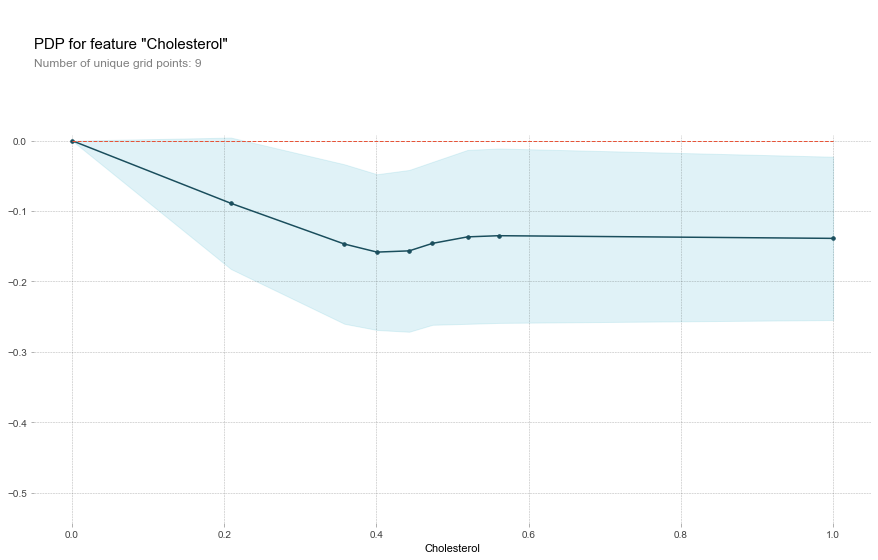

In [140]:
pdp_count = 0

while pdp_count < 11:
    pdp_meas = pdp.pdp_isolate(model = ex_tree_clas, dataset = X_test, model_features = feature_list, feature = pdp_data[pdp_count])
    pdp.pdp_plot(pdp_meas , pdp_data[pdp_count])
    pdp_count += 1

##### [Back to Top](#backtop)

<a id = "Chapter5.2"> </a>
## 7.2 Statistical Analysis

Procedures were adapted from the following paper:

1. Almustafa, K. M., 2020. Prediction of heart disease and classifiers’ sensitivity analysis. _BMC Bioinformatics_, 21(278), pp. 1-18. [Accessed Here](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-03626-y)



In [105]:
def cor_selector(X, y, num_feats):
    
    cor_list = []
    
    feature_name = X.columns.tolist()
    
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    cor_list = [0 if np.isnan(i) else i for i in cor_list]

    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    return cor_support, cor_feature


num_feats=11
cor_support, cor_feature = cor_selector(X, y, num_feats)

print(str(len(cor_feature)), 'selected features')

11 selected features


In [106]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats).fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

print(str(len(chi_feature)), 'selected features')

11 selected features


In [107]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5).fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), 'selected features')

11 selected features


In [108]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty = "l2", solver = 'lbfgs'), max_features=num_feats).fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()

print(str(len(embeded_lr_feature)), 'selected features')

4 selected features


In [109]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='entropy'), max_features=num_feats).fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [110]:
lgbc_clas = LGBMClassifier(n_estimators = 500,
                           learning_rate = 0.05,
                           num_leaves = 32,
                           colsample_bytree = 0.2,
                           reg_alpha = 3,
                           reg_lambda = 1,
                           min_split_gain = 0.01,
                           min_child_weight = 40)

embeded_lgb_selector = SelectFromModel(lgbc_clas, max_features = num_feats).fit(X, y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()

print(str(len(embeded_lgb_feature)), 'selected features')

5 selected features


In [ ]:
feature_name = X.columns
feature_selection_dst = pd.DataFrame({'Feature': feature_name, 
                                      'Pearson': cor_support, 
                                      'Chi Square': chi_support, 
                                      'Recursive Feature Elimination' :rfe_support, 
                                      'Logistics': embeded_lr_support,
                                      'Random Forest': embeded_rf_support, 
                                      'LightGBM': embeded_lgb_support})


feature_selection_dst['Total'] = np.sum(feature_selection_dst, axis = 1)
feature_selection_dst = feature_selection_dst.sort_values(['Total', 'Feature'] , ascending = False)
feature_selection_dst.index = range(1, len(feature_selection_dst) + 1)

In [113]:
feature_selection_dst.head(num_feats)

Feature  Pearson  Chi Square  \
1                      Slope     True        True   
2              ST Depression     True        True   
3                Cholesterol     True        True   
4            Chest Pain Type     True        True   
5         Maximum Heart Rate     True        True   
6                        Age     True        True   
7                        Sex     True        True   
8                Resting ECG     True        True   
9     Resting Blood Pressure     True        True   
10  Exercised-induced Angina     True        True   
11                  Diabetic     True        True   

    Recursive Feature Elimination  Logistics  Random Forest  LightGBM  Total  
1                            True       True           True      True      6  
2                            True       True           True      True      6  
3                            True       True           True      True      6  
4                            True       True           True      True      6  
5                            True      False           True     False      4  
6                            True      False          False      True      4  
7                            True      False          False     False      3  
8                            True      False          False     False      3  
9                            True      False          False     False      3  
10                           True      False          False     False      3  
11                           True      False          False     False      3

##### [Back to Top](#backtop)

<a id = "Chapter6"> </a>

---
# Chapter 8: Feature Reselection
---

In [147]:
X = dst.drop(['Heart Failure', 'Resting Blood Pressure', 'Resting ECG', 'Diabetic', 'Cholesterol'], axis=1)
y = dst['Heart Failure']

con_data = ['Age', 'ST Depression']

scaler = MinMaxScaler()
X[con_data] = scaler.fit_transform(X[con_data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [66]:
def BaseModelList2():
    
    BaseModels = []
    
    BaseModels.append(('Logistic Regression\t\t\t', LogisticRegression(max_iter = 2000)))
    BaseModels.append(('K Nearest Neighbor\t\t\t', KNeighborsClassifier(4)))
    BaseModels.append(('Naive Bayes\t\t\t\t', GaussianNB(var_smoothing = 0.3511191734215131)))
    BaseModels.append(('Decision Tree\t\t\t\t', DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 20, random_state = 42)))
    BaseModels.append(('Extra Tree\t\t\t\t', ExtraTreesClassifier(criterion = 'gini', max_features = 3, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 600, random_state = 42)))
    BaseModels.append(('Random Forest\t\t\t\t', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 3, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 100, random_state = 42)))
    BaseModels.append(('Support Vector Machine (Linear)\t\t', SVC(kernel = 'linear', C = 2, gamma = 1e-05, random_state = 42)))
    BaseModels.append(('Support Vector Machine (RBF)\t\t', SVC(kernel = 'rbf', C = 1, gamma = 0.15, random_state = 42)))
    BaseModels.append(('Adaptive Boost\t\t\t\t', AdaBoostClassifier()))
    BaseModels.append(('Stochastic Gradient Descent\t\t', SGDClassifier(max_iter=3000, tol = 1e-4)))
    BaseModels.append(('Gradient Boosting\t\t\t', GradientBoostingClassifier(n_estimators = 100, max_depth = 2, max_features = 0.3, random_state = 42)))                                                         
    BaseModels.append(('XGBoost\t\t\t\t\t', XGBClassifier(n_estimators= 90, gamma = 0.3, max_depth = 3, min_child_weight = 1, use_label_encoder = False, eval_metric = 'error')))
    BaseModels.append(('Multiple Learning Perceptron\t\t', MLPClassifier(max_iter = 1100)))
                                                               
    return BaseModels

In [67]:
models_list_2 = BaseModelList2()
names_2, results_2 = BaseModelEva(X_train, y_train, models_list_2)

Logistic Regression			: 0.823083 (0.034988)
K Nearest Neighbor			: 0.781318 (0.030007)
Naive Bayes				: 0.676819 (0.073589)
Decision Tree				: 0.832942 (0.028845)
Extra Tree				: 0.842645 (0.028469)
Random Forest				: 0.837148 (0.033105)
Support Vector Machine (Linear)		: 0.830086 (0.033569)
Support Vector Machine (RBF)		: 0.799413 (0.032566)
Adaptive Boost				: 0.835603 (0.049892)
Stochastic Gradient Descent		: 0.659937 (0.124453)
Gradient Boosting			: 0.860739 (0.036866)
XGBoost					: 0.845462 (0.032926)
Multiple Learning Perceptron		: 0.796577 (0.048506)


In [148]:
model_selected_2 = [DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 20, random_state = 42),
                    ExtraTreesClassifier(criterion = 'gini', max_features = 3, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 600, random_state = 42),
                    RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 3, min_samples_leaf = 4, min_samples_split = 3, n_estimators = 100, random_state = 42),
                    SVC(kernel = 'linear', C = 2, gamma = 1e-05, random_state = 42),
                    AdaBoostClassifier(),
                    GradientBoostingClassifier(n_estimators = 100, max_depth = 2, max_features = 0.3, random_state = 42),                                                        
                    XGBClassifier(n_estimators= 90, gamma = 0.3, max_depth = 3, min_child_weight = 1, use_label_encoder = False, eval_metric = 'error'),
                    MLPClassifier(max_iter = 2500)
                   ]

In [149]:
S_train_2, S_test_2 = stacking(model_selected_2,                   
                               X_train, 
                               y_train, 
                               X_test,
                               regression = False, 
                               mode='oof_pred_bag', 
                               metric=accuracy_score, 
                               n_folds=5, 
                               stratified=True,
                               shuffle=True, 
                               random_state = 42,
                               verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [8]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.82638889]
    fold  1:  [0.79861111]
    fold  2:  [0.83333333]
    fold  3:  [0.84615385]
    fold  4:  [0.83216783]
    ----
    MEAN:     [0.82733100] + [0.01574447]
    FULL:     [0.82729805]

model  1:     [ExtraTreesClassifier]
    fold  0:  [0.87500000]
    fold  1:  [0.79861111]
    fold  2:  [0.86805556]
    fold  3:  [0.87412587]
    fold  4:  [0.85314685]
    ----
    MEAN:     [0.85378788] + [0.02867766]
    FULL:     [0.85376045]

model  2:     [RandomForestClassifier]
    fold  0:  [0.84722222]
    fold  1:  [0.82638889]
    fold  2:  [0.86805556]
    fold  3:  [0.83916084]
    fold  4:  [0.86013986]
    ----
    MEAN:     [0.84819347] + [0.01479993]
    FULL:     [0.84818942]

model  3:     [SVC]
    fold  0:  [0.85416667]
    fold  1:  [0.78472222]
    fold  2:  [0.87500000]
    fold  3:  

In [158]:
model_final_2 = MLPClassifier(max_iter = 2000).fit(S_train_2, y_train)
y_pred = model_final_2.predict(S_test_2)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.87222222]


Model  Accuracy  Precision  Sensitivity  Specificity  \
0  Stacked Classifier 2  0.872222   0.878788     0.887755     0.853659   

   F1 Score       ROC  Log Loss  Mathew Correlation coefficent  
0  0.883249  0.870707  4.413341                       0.742199

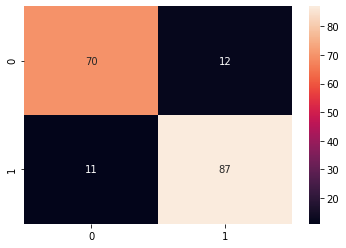

In [159]:
conmat = confusion_matrix(y_test, y_pred)
sns.heatmap(conmat, annot=True)

TN = conmat[0][0]
FN = conmat[1][0]
TP = conmat[1][1]
FP = conmat[0][1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
sensi = recall_score(y_test, y_pred)
speci = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
loglos = log_loss(y_test, y_pred)
mathew = matthews_corrcoef(y_test, y_pred)

model_outcome_2 = pd.DataFrame([['Stacked Classifier 2',
                                  acc, 
                                  prec,
                                  sensi,
                                  speci, 
                                  f1,
                                  roc, 
                                  loglos,
                                  mathew]],

                                  columns = ['Model', 
                                             'Accuracy',
                                             'Precision', 
                                             'Sensitivity',
                                             'Specificity', 
                                             'F1 Score',
                                             'ROC',
                                             'Log Loss',
                                             'Mathew Correlation coefficent'])

model_outcome_2

In [160]:
model_outcome_2.append(model_outcome)

Model  Accuracy  Precision  Sensitivity  \
0              Stacked Classifier 2  0.872222   0.878788     0.887755   
0                Stacked Classifier  0.911111   0.910000     0.928571   
1               Logistic Regression  0.888889   0.882353     0.918367   
2               K Nearest Neighbour  0.888889   0.875000     0.928571   
3                       Naive Bayes  0.883333   0.896907     0.887755   
4                     Decision Tree  0.866667   0.920455     0.826531   
5                        Extra Tree  0.888889   0.882353     0.918367   
6                     Random Forest  0.888889   0.875000     0.928571   
7   Support Vector Machine (Linear)  0.900000   0.892157     0.928571   
8      Support Vector Machine (RBF)  0.877778   0.865385     0.918367   
9                    Adaptive Boost  0.872222   0.878788     0.887755   
10      Stochastic Gradient Descent  0.838889   0.896552     0.795918   
11                   Gradient Boost  0.883333   0.873786     0.918367   
12                          XGBoost  0.855556   0.875000     0.857143   
13     Multiple Learning Perceptron  0.866667   0.836364     0.938776   

    Specificity  F1 Score       ROC  Log Loss  Mathew Correlation coefficent  
0      0.853659  0.883249  0.870707  4.413341                       0.742199  
0      0.890244  0.919192  0.909408  3.070153                       0.820656  
1      0.853659  0.900000  0.886013  3.837695                       0.775898  
2      0.841463  0.900990  0.885017  3.837700                       0.776438  
3      0.878049  0.892308  0.882902  4.029568                       0.765090  
4      0.914634  0.870968  0.870582  4.605201                       0.738413  
5      0.853659  0.900000  0.886013  3.837695                       0.775898  
6      0.841463  0.900990  0.885017  3.837700                       0.776438  
7      0.865854  0.910000  0.897213  3.453927                       0.798409  
8      0.829268  0.891089  0.873818  4.221468                       0.753853  
9      0.853659  0.883249  0.870707  4.413341                       0.742199  
10     0.890244  0.843243  0.843081  5.564621                       0.683826  
11     0.841463  0.895522  0.879915  4.029582                       0.764844  
12     0.853659  0.865979  0.855401  4.988988                       0.709566  
13     0.780488  0.884615  0.859632  4.605250                       0.734789

##### [Back to Top](#backtop)

<a id = "Chapter7"> </a>

---
# Chapter 9: Conclusion
---

1.  Overall, the Stacked Classifier with all of the features included scored the highest in all aspects, indicating the great potential of stacked ensemble algorithm in detecting heart failure!
2.  Feature reselection didn't work as intended likely because it was due to the very limited number of features. 
3.  The removal of less-contributing features may result a drop in performance simply due to the sheer number of clinical indication being reduced! 
3.  If the dataset had a larger pool of features and more instances, feature reselection will conceivably yield a better result as the critical fetures retained may contribute more to the model as poor clinical indications are removed and thus reucing the impact of said clinical indications.
4.  The quality clinical indication discovered in this study include the following:  
    a. Chest pain Type  
    b. Cholesterol  
    c. Sex  
    d. Slope  
    e. Exercise-induced Angina  
5.  Interestingly enough, a, b and c coincided with the study of Almustafa (2020), signifying that the project took the right direction in evaluating the significane of each clinical indications. 
6.  However, it should also be noted that in the study of Almustafa (2020) the dataset used had 15 features with around 2000+ instances, therefore hinting the potential improvement in the model proposed in this project with a larger dataset!

##### [Back to Top](#backtop)